# Reading a bag file with python.

In [2]:
import rosbag
import yaml
import datetime
import numpy as np
import matplotlib.pyplot as plt
import base64
from __future__ import print_function
%matplotlib inline

Load the bag file metadata.

In [3]:
info = yaml.load(rosbag.Bag('2020-05-15-09-32-32.bag','r')._get_yaml_info())

/home/vschmidt/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """Entry point for launching an IPython kernel.


This returns a dictionary having the following keys. 

In [4]:
for k,v in info.items():
    print(k)

end
compression
topics
messages
start
version
types
indexed
path
duration
size


But what does the get_type_and_topic_info() method provide?

In [5]:
typeandtopic = rosbag.Bag('2020-05-15-09-32-32.bag','r').get_type_and_topic_info()

In [6]:
print(typeandtopic[0])

{'actionlib_msgs/GoalID': '302881f31927c1df708a2dbab0e80ee8', 'hover/hoverActionResult': 'b05528ce2d57b2b18c666f6eabecb171', 'geometry_msgs/Twist': '9f195f881246fdfa2798d1d3eebca84a', 'marine_msgs/CourseMadeGoodStamped': '3341aa28daddff73c624255c166d7bff', 'hover/hoverActionGoal': '6051a853e81aad999988ed05bc1e0093', 'actionlib_msgs/GoalStatusArray': '8b2b82f13216d0a8ea88bd3af735e619', 'rosgraph_msgs/Clock': 'a9c97c1d230cfc112e270351a944ee47', 'geometry_msgs/TwistStamped': '98d34b0043a2093cf9d9345ab6eef12e', 'geographic_msgs/GeoPoint': 'c48027a852aeff972be80478ff38e81a', 'geographic_msgs/GeoPointStamped': 'ea50d268b03080563c330351a21edc89', 'hover/hoverActionFeedback': 'deb504a1739e9ce66527720475824e0e', 'marine_msgs/Contact': '78458b28c9a485651992b3f7924a67d1', 'smach_msgs/SmachContainerStatus': '5ba2bb79ac19e3842d562a191f2a675b', 'geometry_msgs/PoseStamped': 'd3812c3cbc69362b77dc0b19b345f8f5', 'std_msgs/String': '992ce8a1687cec8c8bd883ec73ca41d1', 'dynamic_reconfigure/ConfigDescriptio

The first items in the resulting generator is a dictionary of hashes for each message type in the file. Presuably this is used to verify that you have your message definitions correct. 

The second items is big, so rather than print it out, lets just look at the keys to start.

In [7]:
for k,v in typeandtopic[1].items():
    print(k)


/udp/project11/mission_manager/status
/rosout_agg
/project11/response
/project11/desired_speed
/hover_action/parameter_updates
/origin
/hover_action/goal
/hover_action/parameter_descriptions
/mission_manager/parameter_updates
/heartbeat
/udp/origin
/cmg
/coverage
/mission_manager/smach/container_structure
/udp/coverage
/project11/mission_manager/status
/udp/response
/project11/desired_heading
/clock
/project11/piloting_mode
/project11/crab_angle/controller/parameter_updates
/project11/mission_manager/command
/udp/position
/depth
/hover_action/cancel
/hover_action/result
/heading
/mpc/parameter_descriptions
/diagnostics
/mission_manager/parameter_descriptions
/cmd_vel
/udp/command
/udp/diagnostics
/position_map
/asv_sim_node/parameter_updates
/send_command
/mbes_ping
/rosout
/hover_action/feedback
/position
/mpc/parameter_updates
/asv_sim_node/parameter_descriptions
/path_planner_action/status
/project11/display
/udp/heartbeat
/sog
/project11/command
/survey_area_action/status
/path_fol

Ok, so this second item is a dictionary whose keys are each message topic. Lets look at one of them.

In [8]:
print(typeandtopic[1]['/heartbeat'])

TopicTuple(msg_type='marine_msgs/Heartbeat', message_count=286, connections=1, frequency=4.999998807907389)


Ok, so then for each topic, we have the message type, the number of messages in the file, the number of connections (what's this?), and presumably the mean rate at which they are recorded. 

In [9]:
info

{'compression': 'none',
 'duration': 57.1,
 'end': 1589560408.278955,
 'indexed': True,
 'messages': 22623,
 'path': '2020-05-15-09-32-32.bag',
 'size': 28109684,
 'start': 1589560351.178955,
 'topics': [{'messages': 1,
   'topic': '/asv_sim_node/parameter_descriptions',
   'type': 'dynamic_reconfigure/ConfigDescription'},
  {'messages': 1,
   'topic': '/asv_sim_node/parameter_updates',
   'type': 'dynamic_reconfigure/Config'},
  {'frequency': 20.0,
   'messages': 1143,
   'topic': '/clock',
   'type': 'rosgraph_msgs/Clock'},
  {'frequency': 5.0,
   'messages': 165,
   'topic': '/cmd_vel',
   'type': 'geometry_msgs/Twist'},
  {'frequency': 20.0,
   'messages': 1144,
   'topic': '/cmg',
   'type': 'marine_msgs/CourseMadeGoodStamped'},
  {'messages': 596, 'topic': '/contact', 'type': 'marine_msgs/Contact'},
  {'frequency': 3.3333,
   'messages': 208,
   'topic': '/coverage',
   'type': 'geographic_msgs/GeoPath'},
  {'frequency': 3.3333,
   'messages': 190,
   'topic': '/depth',
   'type'

Lets try to the [rosbag_pandas](https://github.com/eurogroep/rosbag_pandas) module and see if this will simplify things. Requires:

    CWD=`pwd`
    cd ~/project11/catkin_ws/src/
    git clone https://github.com/uos/rospy_message_converter.git
    git clone https://github.com/eurogroep/rosbag_pandas.git
    cd .. 
    catkin_make
    source devel/setup.bash
    cd ${CWD}
 

In [10]:
import rosbag_pandas

In [76]:
#df = rosbag_pandas.bag_to_dataframe('2020-05-15-09-32-32.bag')

Ok, the above line caused the Kernel to crash. I tried it multiple times.

Maybe the file is too large, or too complex? Lets try this with a filter.

In [11]:
df = rosbag_pandas.bag_to_dataframe('2020-05-15-09-32-32.bag',include=['/position'])

In [12]:
df.head()

/position/header/frame_id  /position/header/seq  \
1.589560e+09                                           862.0   
1.589560e+09                                           863.0   
1.589560e+09                                           864.0   
1.589560e+09                                           865.0   
1.589560e+09                                           866.0   

              /position/header/stamp/nsecs  /position/header/stamp/secs  \
1.589560e+09                   328955030.0                 1.589560e+09   
1.589560e+09                   378955030.0                 1.589560e+09   
1.589560e+09                   428955030.0                 1.589560e+09   
1.589560e+09                   478955030.0                 1.589560e+09   
1.589560e+09                   528955030.0                 1.589560e+09   

              /position/position/altitude  /position/position/latitude  \
1.589560e+09                          0.0                      43.0734   
1.589560e+09                          0.0                      43.0734   
1.589560e+09                          0.0                      43.0734   
1.589560e+09                          0.0                      43.0734   
1.589560e+09                          0.0                      43.0734   

              /position/position/longitude  
1.589560e+09                    -70.710028  
1.589560e+09                    -70.710027  
1.589560e+09                    -70.710027  
1.589560e+09                    -70.710026  
1.589560e+09                    -70.710026

Ok. So that seemed to work. Maybe there is some particular topic that is causing troubles? Lets try them individually.

In [11]:
DF={}

for k in info['topics']:
    for p,q in k.items():
        if p == 'topic':
            print(q)
            DF[q]=(rosbag_pandas.bag_to_dataframe('2020-05-15-09-32-32.bag',include=[q]))

    

/asv_sim_node/parameter_descriptions
/asv_sim_node/parameter_updates
/clock
/cmd_vel
/cmg
/contact
/coverage
/depth
/diagnostics
/heading
/heartbeat
/hover_action/cancel
/hover_action/feedback
/hover_action/goal
/hover_action/parameter_descriptions
/hover_action/parameter_updates
/hover_action/result
/hover_action/status
/mbes_ping
/mission_manager/parameter_descriptions
/mission_manager/parameter_updates
/mission_manager/smach/container_status
/mission_manager/smach/container_structure
/mpc/parameter_descriptions
/mpc/parameter_updates
/origin
/path_follower_action/status
/path_planner/parameter_descriptions
/path_planner/parameter_updates
/path_planner_action/status
/position
/position_map
/project11/command
/project11/crab_angle/controller/parameter_descriptions
/project11/crab_angle/controller/parameter_updates
/project11/desired_heading
/project11/desired_speed
/project11/display
/project11/mission_manager/command
/project11/mission_manager/status
/project11/piloting_mode
/project

This seems to have worked this time! Lets explore.

In [22]:
for k,v in DF.items():
    print(k)
    display(DF[k].head())

/udp/project11/mission_manager/status


/udp/project11/mission_manager/status/header/frame_id  \
1.589560e+09                                                         
1.589560e+09                                                         
1.589560e+09                                                         
1.589560e+09                                                         
1.589560e+09                                                         

              /udp/project11/mission_manager/status/header/seq  \
1.589560e+09                                             426.0   
1.589560e+09                                             427.0   
1.589560e+09                                             428.0   
1.589560e+09                                             429.0   
1.589560e+09                                             430.0   

              /udp/project11/mission_manager/status/header/stamp/nsecs  \
1.589560e+09                                        228955030.0          
1.589560e+09                                        328955030.0          
1.589560e+09                                        428955030.0          
1.589560e+09                                        528955030.0          
1.589560e+09                                        628955030.0          

              /udp/project11/mission_manager/status/header/stamp/secs  \
1.589560e+09                                       1.589560e+09         
1.589560e+09                                       1.589560e+09         
1.589560e+09                                       1.589560e+09         
1.589560e+09                                       1.589560e+09         
1.589560e+09                                       1.589560e+09         

             /udp/project11/mission_manager/status/values/0/key  \
1.589560e+09                                              state   
1.589560e+09                                              state   
1.589560e+09                                              state   
1.589560e+09                                              state   
1.589560e+09                                              state   

             /udp/project11/mission_manager/status/values/0/value  \
1.589560e+09                                              Pause     
1.589560e+09                                              Pause     
1.589560e+09                                              Pause     
1.589560e+09                                              Pause     
1.589560e+09                                              Pause     

             /udp/project11/mission_manager/status/values/1/key  \
1.589560e+09                                        tasks_count   
1.589560e+09                                        tasks_count   
1.589560e+09                                        tasks_count   
1.589560e+09                                        tasks_count   
1.589560e+09                                        tasks_count   

             /udp/project11/mission_manager/status/values/1/value  \
1.589560e+09                                                  0     
1.589560e+09                                                  0     
1.589560e+09                                                  0     
1.589560e+09                                                  0     
1.589560e+09                                                  0     

             /udp/project11/mission_manager/status/values/2/key  \
1.589560e+09                                       current_task   
1.589560e+09                                       current_task   
1.589560e+09                                       current_task   
1.589560e+09                                       current_task   
1.589560e+09                                       current_task   

             /udp/project11/mission_manager/status/values/2/value  
1.589560e+09                                               None    
1.589560e+09                                               None    
1.589560e+09                                               None    


/rosout_agg


/rosout_agg/file  \
1.589560e+09  /tmp/binarydeb/ros-melodic-pid-0.0.27/src/pid.cpp   
1.589560e+09  /tmp/binarydeb/ros-melodic-pid-0.0.27/src/pid.cpp   
1.589560e+09                                   state_machine.py   
1.589560e+09                                   state_machine.py   
1.589560e+09                                   state_machine.py   

                   /rosout_agg/function /rosout_agg/header/frame_id  \
1.589560e+09       PidObject::PidObject                               
1.589560e+09       PidObject::PidObject                               
1.589560e+09  StateMachine._update_once                               
1.589560e+09       StateMachine.execute                               
1.589560e+09  StateMachine._update_once                               

              /rosout_agg/header/seq  /rosout_agg/header/stamp/nsecs  \
1.589560e+09                   116.0                     328955030.0   
1.589560e+09                   117.0                     378955030.0   
1.589560e+09                   118.0                     328955030.0   
1.589560e+09                   119.0                     328955030.0   
1.589560e+09                   120.0                     328955030.0   

              /rosout_agg/header/stamp/secs  /rosout_agg/level  \
1.589560e+09                   1.589560e+09                4.0   
1.589560e+09                   1.589560e+09                4.0   
1.589560e+09                   1.589560e+09                2.0   
1.589560e+09                   1.589560e+09                2.0   
1.589560e+09                   1.589560e+09                2.0   

              /rosout_agg/line  \
1.589560e+09              59.0   
1.589560e+09              59.0   
1.589560e+09             283.0   
1.589560e+09             347.0   
1.589560e+09             283.0   

                                                /rosout_agg/msg  \
1.589560e+09                Waiting for first setpoint message.   
1.589560e+09                Waiting for first setpoint message.   
1.589560e+09  State machine transitioning 'PAUSE':'resume'--...   
1.589560e+09  State machine starting in initial state 'IDLE'...   
1.589560e+09  State machine transitioning 'IDLE':'do-task'--...   

                              /rosout_agg/name          ...           \
1.589560e+09  /project11/crab_angle/controller          ...            
1.589560e+09  /project11/crab_angle/controller          ...            
1.589560e+09                  /mission_manager          ...            
1.589560e+09                  /mission_manager          ...            
1.589560e+09                  /mission_manager          ...            

                                           /rosout_agg/topics/3  \
1.589560e+09  /project11/crab_angle/controller/parameter_des...   
1.589560e+09  /project11/crab_angle/controller/parameter_des...   
1.589560e+09                           /survey_area_action/goal   
1.589560e+09                           /survey_area_action/goal   
1.589560e+09                           /survey_area_action/goal   

             /rosout_agg/topics/30       /rosout_agg/topics/31  \
1.589560e+09                  None                        None   
1.589560e+09                  None                        None   
1.589560e+09  /hover_action/status  /path_follower_action/goal   
1.589560e+09  /hover_action/status  /path_follower_action/goal   
1.589560e+09  /hover_action/status  /path_follower_action/goal   

                              /rosout_agg/topics/32  \
1.589560e+09                                   None   
1.589560e+09                                   None   
1.589560e+09  /mission_manager/smach/container_init   
1.589560e+09  /mission_manager/smach/container_init   
1.589560e+09  /mission_manager/smach/container_init   

                                           /rosout_agg/topics/4  \
1.589560e+09  /project11/crab_angle/controller/parameter_upd...   
1.589560e+09  /project11/crab_angle/controller/parameter_upd...   
1.589560e+09  

/project11/response


/project11/response/data
1.589560e+09  2020-05-15T16:32:58.193703 mission_manager
1.589560e+09    2020-05-15T16:32:58.194006 piloting_mode
1.589560e+09  2020-05-15T16:33:17.562644 mission_manager
1.589560e+09    2020-05-15T16:33:17.563354 piloting_mode

/project11/desired_speed


/project11/desired_speed/header/frame_id  \
1.589560e+09                                            
1.589560e+09                                            
1.589560e+09                                            
1.589560e+09                                            
1.589560e+09                                            

              /project11/desired_speed/header/seq  \
1.589560e+09                                  0.0   
1.589560e+09                                  1.0   
1.589560e+09                                  2.0   
1.589560e+09                                  3.0   
1.589560e+09                                  4.0   

              /project11/desired_speed/header/stamp/nsecs  \
1.589560e+09                                  328955030.0   
1.589560e+09                                  378955030.0   
1.589560e+09                                  428955030.0   
1.589560e+09                                  478955030.0   
1.589560e+09                                  528955030.0   

              /project11/desired_speed/header/stamp/secs  \
1.589560e+09                                1.589560e+09   
1.589560e+09                                1.589560e+09   
1.589560e+09                                1.589560e+09   
1.589560e+09                                1.589560e+09   
1.589560e+09                                1.589560e+09   

              /project11/desired_speed/twist/angular/x  \
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   

              /project11/desired_speed/twist/angular/y  \
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   

              /project11/desired_speed/twist/angular/z  \
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   

              /project11/desired_speed/twist/linear/x  \
1.589560e+09                                      3.0   
1.589560e+09                                      3.0   
1.589560e+09                                      3.0   
1.589560e+09                                      3.0   
1.589560e+09                                      3.0   

              /project11/desired_speed/twist/linear/y  \
1.589560e+09                                      0.0   
1.589560e+09                                      0.0   
1.589560e+09                                      0.0   
1.589560e+09                                      0.0   
1.589560e+09                                      0.0   

              /project11/desired_speed/twist/linear/z  
1.589560e+09                                      0.0  
1.589560e+09                                      0.0  
1.589560e+09                                      0.0  
1.589560e+09                                      0.0  
1.589560e+09                                      0.0

/hover_action/parameter_updates


/hover_action/parameter_updates/bools  \
1.589560e+09                                    []   

             /hover_action/parameter_updates/doubles/0/name  \
1.589560e+09                               minimum_distance   

              /hover_action/parameter_updates/doubles/0/value  \
1.589560e+09                                              5.0   

             /hover_action/parameter_updates/doubles/1/name  \
1.589560e+09                               maximum_distance   

              /hover_action/parameter_updates/doubles/1/value  \
1.589560e+09                                             25.0   

             /hover_action/parameter_updates/doubles/2/name  \
1.589560e+09                                  maximum_speed   

              /hover_action/parameter_updates/doubles/2/value  \
1.589560e+09                                              3.0   

              /hover_action/parameter_updates/groups/0/id  \
1.589560e+09                                          0.0   

             /hover_action/parameter_updates/groups/0/name  \
1.589560e+09                                       Default   

              /hover_action/parameter_updates/groups/0/parent  \
1.589560e+09                                              0.0   

              /hover_action/parameter_updates/groups/0/state  \
1.589560e+09                                             1.0   

             /hover_action/parameter_updates/ints  \
1.589560e+09                                   []   

             /hover_action/parameter_updates/strs  
1.589560e+09                                   []

/origin


/origin/altitude  /origin/latitude  /origin/longitude
1.589560e+09               0.0         43.073397         -70.710541
1.589560e+09               0.0         43.073397         -70.710541
1.589560e+09               0.0         43.073397         -70.710541
1.589560e+09               0.0         43.073397         -70.710541
1.589560e+09               0.0         43.073397         -70.710541

/hover_action/goal


/hover_action/goal/goal/target/altitude  \
1.589560e+09                                      0.0   
1.589560e+09                                      0.0   

              /hover_action/goal/goal/target/latitude  \
1.589560e+09                                43.075781   
1.589560e+09                                43.074251   

              /hover_action/goal/goal/target/longitude  \
1.589560e+09                                -70.710604   
1.589560e+09                                -70.710027   

                  /hover_action/goal/goal_id/id  \
1.589560e+09  /mission_manager-1-1589560375.329   
1.589560e+09  /mission_manager-2-1589560393.329   

              /hover_action/goal/goal_id/stamp/nsecs  \
1.589560e+09                             328955030.0   
1.589560e+09                             328955030.0   

              /hover_action/goal/goal_id/stamp/secs  \
1.589560e+09                           1.589560e+09   
1.589560e+09                           1.589560e+09   

             /hover_action/goal/header/frame_id  \
1.589560e+09                                      
1.589560e+09                                      

              /hover_action/goal/header/seq  \
1.589560e+09                            1.0   
1.589560e+09                            2.0   

              /hover_action/goal/header/stamp/nsecs  \
1.589560e+09                            328955030.0   
1.589560e+09                            328955030.0   

              /hover_action/goal/header/stamp/secs  
1.589560e+09                          1.589560e+09  
1.589560e+09                          1.589560e+09

/hover_action/parameter_descriptions


/hover_action/parameter_descriptions/dflt/bools  \
1.589560e+09                                              []   

             /hover_action/parameter_descriptions/dflt/doubles/0/name  \
1.589560e+09                                   minimum_distance         

              /hover_action/parameter_descriptions/dflt/doubles/0/value  \
1.589560e+09                                                5.0           

             /hover_action/parameter_descriptions/dflt/doubles/1/name  \
1.589560e+09                                   maximum_distance         

              /hover_action/parameter_descriptions/dflt/doubles/1/value  \
1.589560e+09                                               25.0           

             /hover_action/parameter_descriptions/dflt/doubles/2/name  \
1.589560e+09                                      maximum_speed         

              /hover_action/parameter_descriptions/dflt/doubles/2/value  \
1.589560e+09                                                3.0           

              /hover_action/parameter_descriptions/dflt/groups/0/id  \
1.589560e+09                                                0.0       

             /hover_action/parameter_descriptions/dflt/groups/0/name  \
1.589560e+09                                            Default        

              /hover_action/parameter_descriptions/dflt/groups/0/parent  \
1.589560e+09                                                0.0           

                                  ...                       \
1.589560e+09                      ...                        

              /hover_action/parameter_descriptions/min/doubles/1/name  \
1.589560e+09                                   maximum_distance         

             /hover_action/parameter_descriptions/min/doubles/1/value  \
1.589560e+09                                                0.0         

             /hover_action/parameter_descriptions/min/doubles/2/name  \
1.589560e+09                                      maximum_speed        

              /hover_action/parameter_descriptions/min/doubles/2/value  \
1.589560e+09                                                0.0          

             /hover_action/parameter_descriptions/min/groups/0/id  \
1.589560e+09                                                0.0     

             /hover_action/parameter_descriptions/min/groups/0/name  \
1.589560e+09                                            Default       

             /hover_action/parameter_descriptions/min/groups/0/parent  \
1.589560e+09                                                0.0         

              /hover_action/parameter_descriptions/min/groups/0/state  \
1.589560e+09                                                1.0         

             /hover_action/parameter_descriptions/min/ints  \
1.589560e+09                                            []   

             /hover_action/parameter_descriptions/min/strs  
1.589560e+09                                            []  

[1 rows x 58 columns]

/mission_manager/parameter_updates


/mission_manager/parameter_updates/bools  \
1.589560e+09                                       []   

             /mission_manager/parameter_updates/doubles/0/name  \
1.589560e+09                                     default_speed   

              /mission_manager/parameter_updates/doubles/0/value  \
1.589560e+09                                                2.5    

             /mission_manager/parameter_updates/doubles/1/name  \
1.589560e+09                                    segment_length   

              /mission_manager/parameter_updates/doubles/1/value  \
1.589560e+09                                                5.0    

             /mission_manager/parameter_updates/doubles/2/name  \
1.589560e+09                                       turn_radius   

              /mission_manager/parameter_updates/doubles/2/value  \
1.589560e+09                                               25.0    

             /mission_manager/parameter_updates/doubles/3/name  \
1.589560e+09                                waypoint_threshold   

              /mission_manager/parameter_updates/doubles/3/value  \
1.589560e+09                                               10.0    

              /mission_manager/parameter_updates/groups/0/id  \
1.589560e+09                                             0.0   

             /mission_manager/parameter_updates/groups/0/name  \
1.589560e+09                                          Default   

              /mission_manager/parameter_updates/groups/0/parent  \
1.589560e+09                                                0.0    

              /mission_manager/parameter_updates/groups/0/state  \
1.589560e+09                                                1.0   

             /mission_manager/parameter_updates/ints/0/name  \
1.589560e+09                                        planner   

              /mission_manager/parameter_updates/ints/0/value  \
1.589560e+09                                              0.0   

             /mission_manager/parameter_updates/ints/1/name  \
1.589560e+09                                  done_behavior   

              /mission_manager/parameter_updates/ints/1/value  \
1.589560e+09                                              0.0   

             /mission_manager/parameter_updates/strs  
1.589560e+09                                      []

/heartbeat


/heartbeat/header/frame_id  /heartbeat/header/seq  \
1.589560e+09                                             215.0   
1.589560e+09                                             216.0   
1.589560e+09                                             217.0   
1.589560e+09                                             218.0   
1.589560e+09                                             219.0   

              /heartbeat/header/stamp/nsecs  /heartbeat/header/stamp/secs  \
1.589560e+09                    228955030.0                  1.589560e+09   
1.589560e+09                    428955030.0                  1.589560e+09   
1.589560e+09                    628955030.0                  1.589560e+09   
1.589560e+09                    828955030.0                  1.589560e+09   
1.589560e+09                     28955030.0                  1.589560e+09   

             /heartbeat/values/0/key /heartbeat/values/0/value  
1.589560e+09           piloting_mode                   standby  
1.589560e+09           piloting_mode                   standby  
1.589560e+09           piloting_mode                   standby  
1.589560e+09           piloting_mode                   standby  
1.589560e+09           piloting_mode                   standby

/udp/origin


/udp/origin/altitude  /udp/origin/latitude  \
1.589560e+09                   0.0             43.073397   
1.589560e+09                   0.0             43.073397   
1.589560e+09                   0.0             43.073397   
1.589560e+09                   0.0             43.073397   
1.589560e+09                   0.0             43.073397   

              /udp/origin/longitude  
1.589560e+09             -70.710541  
1.589560e+09             -70.710541  
1.589560e+09             -70.710541  
1.589560e+09             -70.710541  
1.589560e+09             -70.710541

/cmg


/cmg/course /cmg/header/frame_id  /cmg/header/seq  \
1.589560e+09    89.950758                                 853.0   
1.589560e+09    90.670250                                 854.0   
1.589560e+09    91.351133                                 855.0   
1.589560e+09    90.809375                                 856.0   
1.589560e+09    91.180132                                 857.0   

              /cmg/header/stamp/nsecs  /cmg/header/stamp/secs  
1.589560e+09               78955030.0            1.589560e+09  
1.589560e+09              128955030.0            1.589560e+09  
1.589560e+09              178955030.0            1.589560e+09  
1.589560e+09              228955030.0            1.589560e+09  
1.589560e+09              278955030.0            1.589560e+09

/coverage


/coverage/header/frame_id  /coverage/header/seq  \
1.589560e+09                                           145.0   
1.589560e+09                                           146.0   
1.589560e+09                                           147.0   
1.589560e+09                                           148.0   
1.589560e+09                                           149.0   

              /coverage/header/stamp/nsecs  /coverage/header/stamp/secs  \
1.589560e+09                           0.0                          0.0   
1.589560e+09                           0.0                          0.0   
1.589560e+09                           0.0                          0.0   
1.589560e+09                           0.0                          0.0   
1.589560e+09                           0.0                          0.0   

             /coverage/poses/0/header/frame_id  /coverage/poses/0/header/seq  \
1.589560e+09                                                             0.0   
1.589560e+09                                                             0.0   
1.589560e+09                                                             0.0   
1.589560e+09                                                             0.0   
1.589560e+09                                                             0.0   

              /coverage/poses/0/header/stamp/nsecs  \
1.589560e+09                                   0.0   
1.589560e+09                                   0.0   
1.589560e+09                                   0.0   
1.589560e+09                                   0.0   
1.589560e+09                                   0.0   

              /coverage/poses/0/header/stamp/secs  \
1.589560e+09                                  0.0   
1.589560e+09                                  0.0   
1.589560e+09                                  0.0   
1.589560e+09                                  0.0   
1.589560e+09                                  0.0   

              /coverage/poses/0/pose/orientation/w  \
1.589560e+09                                   0.0   
1.589560e+09                                   0.0   
1.589560e+09                                   0.0   
1.589560e+09                                   0.0   
1.589560e+09                                   0.0   

              /coverage/poses/0/pose/orientation/x  \
1.589560e+09                                   0.0   
1.589560e+09                                   0.0   
1.589560e+09                                   0.0   
1.589560e+09                                   0.0   
1.589560e+09                                   0.0   

                                 ...                       \
1.589560e+09                     ...                        
1.589560e+09                     ...                        
1.589560e+09                     ...                        
1.589560e+09                     ...                        
1.589560e+09                     ...                        

              /coverage/poses/993/header/seq  \
1.589560e+09                             NaN   
1.589560e+09                             NaN   
1.589560e+09                             NaN   
1.589560e+09                             NaN   
1.589560e+09                             NaN   

              /coverage/poses/993/header/stamp/nsecs  \
1.589560e+09                                     NaN   
1.589560e+09                                     NaN   
1.589560e+09                                     NaN   
1.589560e+09                                     NaN   
1.589560e+09                                     NaN   

              /coverage/poses/993/header/stamp/secs  \
1.589560e+09                                    NaN   
1.589560e+09                                    NaN   
1.589560e+09                                    NaN   
1.589560e+09                                    NaN   
1.589560e+09                                    NaN   

              /coverage/poses/993/pose/orientation/w  \
1.589560e+09          

/mission_manager/smach/container_structure


/mission_manager/smach/container_structure/children/0  \
1.589560e+09                                         AUTONOMOUS      
1.589560e+09                                              HOVER      
1.589560e+09                                              HOVER      
1.589560e+09                                         AUTONOMOUS      
1.589560e+09                                              HOVER      

             /mission_manager/smach/container_structure/children/1  \
1.589560e+09                                              PAUSE      
1.589560e+09                                               GOTO      
1.589560e+09                                               GOTO      
1.589560e+09                                              PAUSE      
1.589560e+09                                               GOTO      

             /mission_manager/smach/container_structure/children/2  \
1.589560e+09                                               None      
1.589560e+09                                         SURVEYAREA      
1.589560e+09                                         SURVEYAREA      
1.589560e+09                                               None      
1.589560e+09                                         SURVEYAREA      

             /mission_manager/smach/container_structure/children/3  \
1.589560e+09                                               None      
1.589560e+09                                         FOLLOWPATH      
1.589560e+09                                         FOLLOWPATH      
1.589560e+09                                               None      
1.589560e+09                                         FOLLOWPATH      

             /mission_manager/smach/container_structure/children/4  \
1.589560e+09                                               None      
1.589560e+09                                               IDLE      
1.589560e+09                                               IDLE      
1.589560e+09                                               None      
1.589560e+09                                               IDLE      

             /mission_manager/smach/container_structure/children/5  \
1.589560e+09                                               None      
1.589560e+09                                           NEXTTASK      
1.589560e+09                                           NEXTTASK      
1.589560e+09                                               None      
1.589560e+09                                           NEXTTASK      

             /mission_manager/smach/container_structure/children/6  \
1.589560e+09                                               None      
1.589560e+09                                          LINEENDED      
1.589560e+09                                          LINEENDED      
1.589560e+09                                               None      
1.589560e+09                                          LINEENDED      

             /mission_manager/smach/container_structure/children/7  \
1.589560e+09                                               None      
1.589560e+09                                        MISSIONPLAN      
1.589560e+09                                        MISSIONPLAN      
1.589560e+09                                               None      
1.589560e+09                                        MISSIONPLAN      

             /mission_manager/smach/container_structure/container_outcomes/0  \
1.589560e+09                                               exit                
1.589560e+09                                              pause                
1.589560e+09                                              pause                
1.589560e+09                                               exit                
1.589560e+09                                              pause                

             /mission_manager/smach/container_structure/container_outcomes/1  \
1.589560e+09                                               None                
1.58

/udp/coverage


/udp/coverage/header/frame_id  /udp/coverage/header/seq  \
1.589560e+09                                                   146.0   
1.589560e+09                                                   147.0   
1.589560e+09                                                   148.0   
1.589560e+09                                                   149.0   
1.589560e+09                                                   150.0   

              /udp/coverage/header/stamp/nsecs  \
1.589560e+09                               0.0   
1.589560e+09                               0.0   
1.589560e+09                               0.0   
1.589560e+09                               0.0   
1.589560e+09                               0.0   

              /udp/coverage/header/stamp/secs  \
1.589560e+09                              0.0   
1.589560e+09                              0.0   
1.589560e+09                              0.0   
1.589560e+09                              0.0   
1.589560e+09                              0.0   

             /udp/coverage/poses/0/header/frame_id  \
1.589560e+09                                         
1.589560e+09                                         
1.589560e+09                                         
1.589560e+09                                         
1.589560e+09                                         

              /udp/coverage/poses/0/header/seq  \
1.589560e+09                               0.0   
1.589560e+09                               0.0   
1.589560e+09                               0.0   
1.589560e+09                               0.0   
1.589560e+09                               0.0   

              /udp/coverage/poses/0/header/stamp/nsecs  \
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   

              /udp/coverage/poses/0/header/stamp/secs  \
1.589560e+09                                      0.0   
1.589560e+09                                      0.0   
1.589560e+09                                      0.0   
1.589560e+09                                      0.0   
1.589560e+09                                      0.0   

              /udp/coverage/poses/0/pose/orientation/w  \
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   

              /udp/coverage/poses/0/pose/orientation/x  \
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   
1.589560e+09                                       0.0   

                                   ...                         \
1.589560e+09                       ...                          
1.589560e+09                       ...                          
1.589560e+09                       ...                          
1.589560e+09                       ...                          
1.589560e+09                       ...                          

              /udp/coverage/poses/993/header/seq  \
1.589560e+09                                 NaN   
1.589560e+09                                 NaN   
1.589560e+09                                 NaN   
1.589560e+09                                 NaN   
1.589560e+09                                 NaN   

              /udp/coverage/poses/993/header/stamp/nsecs  \
1.589560e+09                                         NaN   
1.589560e+09                                         NaN   
1.589560e+09                                         NaN   
1.589560e+09            

/project11/mission_manager/status


/project11/mission_manager/status/header/frame_id  \
1.589560e+09                                                     
1.589560e+09                                                     
1.589560e+09                                                     
1.589560e+09                                                     
1.589560e+09                                                     

              /project11/mission_manager/status/header/seq  \
1.589560e+09                                         426.0   
1.589560e+09                                         427.0   
1.589560e+09                                         428.0   
1.589560e+09                                         429.0   
1.589560e+09                                         430.0   

              /project11/mission_manager/status/header/stamp/nsecs  \
1.589560e+09                                        128955030.0      
1.589560e+09                                        228955030.0      
1.589560e+09                                        328955030.0      
1.589560e+09                                        428955030.0      
1.589560e+09                                        528955030.0      

              /project11/mission_manager/status/header/stamp/secs  \
1.589560e+09                                       1.589560e+09     
1.589560e+09                                       1.589560e+09     
1.589560e+09                                       1.589560e+09     
1.589560e+09                                       1.589560e+09     
1.589560e+09                                       1.589560e+09     

             /project11/mission_manager/status/values/0/key  \
1.589560e+09                                          state   
1.589560e+09                                          state   
1.589560e+09                                          state   
1.589560e+09                                          state   
1.589560e+09                                          state   

             /project11/mission_manager/status/values/0/value  \
1.589560e+09                                            Pause   
1.589560e+09                                            Pause   
1.589560e+09                                            Pause   
1.589560e+09                                            Pause   
1.589560e+09                                            Pause   

             /project11/mission_manager/status/values/1/key  \
1.589560e+09                                    tasks_count   
1.589560e+09                                    tasks_count   
1.589560e+09                                    tasks_count   
1.589560e+09                                    tasks_count   
1.589560e+09                                    tasks_count   

             /project11/mission_manager/status/values/1/value  \
1.589560e+09                                                0   
1.589560e+09                                                0   
1.589560e+09                                                0   
1.589560e+09                                                0   
1.589560e+09                                                0   

             /project11/mission_manager/status/values/2/key  \
1.589560e+09                                   current_task   
1.589560e+09                                   current_task   
1.589560e+09                                   current_task   
1.589560e+09                                   current_task   
1.589560e+09                                   current_task   

             /project11/mission_manager/status/values/2/value  
1.589560e+09                                             None  
1.589560e+09                                             None  
1.589560e+09                                             None  
1.589560e+09                                             None  
1.589560e+09                                             None

/udp/response


/udp/response/data
1.589560e+09  2020-05-15T16:32:58.193703 mission_manager
1.589560e+09    2020-05-15T16:32:58.194006 piloting_mode
1.589560e+09  2020-05-15T16:33:17.562644 mission_manager
1.589560e+09    2020-05-15T16:33:17.563354 piloting_mode

/project11/desired_heading


/project11/desired_heading/header/frame_id  \
1.589560e+09                                              
1.589560e+09                                              
1.589560e+09                                              
1.589560e+09                                              
1.589560e+09                                              

              /project11/desired_heading/header/seq  \
1.589560e+09                                    0.0   
1.589560e+09                                    1.0   
1.589560e+09                                    2.0   
1.589560e+09                                    3.0   
1.589560e+09                                    4.0   

              /project11/desired_heading/header/stamp/nsecs  \
1.589560e+09                                    328955030.0   
1.589560e+09                                    378955030.0   
1.589560e+09                                    428955030.0   
1.589560e+09                                    478955030.0   
1.589560e+09                                    528955030.0   

              /project11/desired_heading/header/stamp/secs  \
1.589560e+09                                  1.589560e+09   
1.589560e+09                                  1.589560e+09   
1.589560e+09                                  1.589560e+09   
1.589560e+09                                  1.589560e+09   
1.589560e+09                                  1.589560e+09   

              /project11/desired_heading/orientation/heading  \
1.589560e+09                                      345.119693   
1.589560e+09                                      345.111523   
1.589560e+09                                      345.102528   
1.589560e+09                                      345.091258   
1.589560e+09                                      345.082180   

              /project11/desired_heading/orientation/pitch  \
1.589560e+09                                           0.0   
1.589560e+09                                           0.0   
1.589560e+09                                           0.0   
1.589560e+09                                           0.0   
1.589560e+09                                           0.0   

              /project11/desired_heading/orientation/roll  
1.589560e+09                                          0.0  
1.589560e+09                                          0.0  
1.589560e+09                                          0.0  
1.589560e+09                                          0.0  
1.589560e+09                                          0.0

/clock


/clock/clock/nsecs  /clock/clock/secs
1.589560e+09         178955030.0       1.589560e+09
1.589560e+09         228955030.0       1.589560e+09
1.589560e+09         278955030.0       1.589560e+09
1.589560e+09         328955030.0       1.589560e+09
1.589560e+09         378955030.0       1.589560e+09

/project11/piloting_mode


/project11/piloting_mode/data
1.589560e+09                    autonomous
1.589560e+09                    autonomous

/project11/crab_angle/controller/parameter_updates


/project11/crab_angle/controller/parameter_updates/bools  \
1.589560e+09                                                 []         

             /project11/crab_angle/controller/parameter_updates/doubles/0/name  \
1.589560e+09                                           Kp_scale                  

              /project11/crab_angle/controller/parameter_updates/doubles/0/value  \
1.589560e+09                                               10.0                    

             /project11/crab_angle/controller/parameter_updates/doubles/1/name  \
1.589560e+09                                                 Kp                  

              /project11/crab_angle/controller/parameter_updates/doubles/1/value  \
1.589560e+09                                                1.0                    

             /project11/crab_angle/controller/parameter_updates/doubles/2/name  \
1.589560e+09                                           Ki_scale                  

              /project11/crab_angle/controller/parameter_updates/doubles/2/value  \
1.589560e+09                                               10.0                    

             /project11/crab_angle/controller/parameter_updates/doubles/3/name  \
1.589560e+09                                                 Ki                  

              /project11/crab_angle/controller/parameter_updates/doubles/3/value  \
1.589560e+09                                                0.2                    

             /project11/crab_angle/controller/parameter_updates/doubles/4/name  \
1.589560e+09                                           Kd_scale                  

              /project11/crab_angle/controller/parameter_updates/doubles/4/value  \
1.589560e+09                                                0.1                    

             /project11/crab_angle/controller/parameter_updates/doubles/5/name  \
1.589560e+09                                                 Kd                  

              /project11/crab_angle/controller/parameter_updates/doubles/5/value  \
1.589560e+09                                                0.0                    

              /project11/crab_angle/controller/parameter_updates/groups/0/id  \
1.589560e+09                                                0.0                

             /project11/crab_angle/controller/parameter_updates/groups/0/name  \
1.589560e+09                                            Default                 

              /project11/crab_angle/controller/parameter_updates/groups/0/parent  \
1.589560e+09                                                0.0                    

              /project11/crab_angle/controller/parameter_updates/groups/0/state  \
1.589560e+09                                                1.0                   

             /project11/crab_angle/controller/parameter_updates/ints  \
1.589560e+09                                                 []        

             /project11/crab_angle/controller/parameter_updates/strs  
1.589560e+09                                                 []

/project11/mission_manager/command


/project11/mission_manager/command/data
1.589560e+09   override hover 43.0757805 -70.7106041
1.589560e+09   override hover 43.0742513 -70.7100275

/udp/position


/udp/position/header/frame_id  /udp/position/header/seq  \
1.589560e+09                                                   856.0   
1.589560e+09                                                   857.0   
1.589560e+09                                                   858.0   
1.589560e+09                                                   859.0   
1.589560e+09                                                   860.0   

              /udp/position/header/stamp/nsecs  \
1.589560e+09                       178955030.0   
1.589560e+09                       228955030.0   
1.589560e+09                       278955030.0   
1.589560e+09                       328955030.0   
1.589560e+09                       378955030.0   

              /udp/position/header/stamp/secs  \
1.589560e+09                     1.589560e+09   
1.589560e+09                     1.589560e+09   
1.589560e+09                     1.589560e+09   
1.589560e+09                     1.589560e+09   
1.589560e+09                     1.589560e+09   

              /udp/position/position/altitude  \
1.589560e+09                              0.0   
1.589560e+09                              0.0   
1.589560e+09                              0.0   
1.589560e+09                              0.0   
1.589560e+09                              0.0   

              /udp/position/position/latitude  \
1.589560e+09                          43.0734   
1.589560e+09                          43.0734   
1.589560e+09                          43.0734   
1.589560e+09                          43.0734   
1.589560e+09                          43.0734   

              /udp/position/position/longitude  
1.589560e+09                        -70.710030  
1.589560e+09                        -70.710029  
1.589560e+09                        -70.710029  
1.589560e+09                        -70.710028  
1.589560e+09                        -70.710027

/depth


/depth/data
1.589560e+09         9.96
1.589560e+09         9.96
1.589560e+09         9.96
1.589560e+09         9.96
1.589560e+09         9.96

/hover_action/cancel


/hover_action/cancel/id  \
1.589560e+09  /mission_manager-1-1589560375.329   

              /hover_action/cancel/stamp/nsecs  \
1.589560e+09                               0.0   

              /hover_action/cancel/stamp/secs  
1.589560e+09                              0.0

/hover_action/result


/hover_action/result/header/frame_id  \
1.589560e+09                                        

              /hover_action/result/header/seq  \
1.589560e+09                              0.0   

              /hover_action/result/header/stamp/nsecs  \
1.589560e+09                              328955030.0   

              /hover_action/result/header/stamp/secs  \
1.589560e+09                            1.589560e+09   

              /hover_action/result/result/ok  \
1.589560e+09                             0.0   

             /hover_action/result/status/goal_id/id  \
1.589560e+09      /mission_manager-1-1589560375.329   

              /hover_action/result/status/goal_id/stamp/nsecs  \
1.589560e+09                                      328955030.0   

              /hover_action/result/status/goal_id/stamp/secs  \
1.589560e+09                                    1.589560e+09   

              /hover_action/result/status/status  \
1.589560e+09                                 2.0   

             /hover_action/result/status/text  
1.589560e+09

/heading


/heading/header/frame_id  /heading/header/seq  \
1.589560e+09                                         857.0   
1.589560e+09                                         858.0   
1.589560e+09                                         859.0   
1.589560e+09                                         860.0   
1.589560e+09                                         861.0   

              /heading/header/stamp/nsecs  /heading/header/stamp/secs  \
1.589560e+09                  178955030.0                1.589560e+09   
1.589560e+09                  228955030.0                1.589560e+09   
1.589560e+09                  278955030.0                1.589560e+09   
1.589560e+09                  328955030.0                1.589560e+09   
1.589560e+09                  378955030.0                1.589560e+09   

              /heading/orientation/heading  /heading/orientation/pitch  \
1.589560e+09                      57.29578                         0.0   
1.589560e+09                      57.29578                         0.0   
1.589560e+09                      57.29578                         0.0   
1.589560e+09                      57.29578                         0.0   
1.589560e+09                      57.29578                         0.0   

              /heading/orientation/roll  
1.589560e+09                        0.0  
1.589560e+09                        0.0  
1.589560e+09                        0.0  
1.589560e+09                        0.0  
1.589560e+09                        0.0

/mpc/parameter_descriptions


/mpc/parameter_descriptions/dflt/bools  \
1.589560e+09                                     []   

             /mpc/parameter_descriptions/dflt/doubles/0/name  \
1.589560e+09                                    weight_slope   

              /mpc/parameter_descriptions/dflt/doubles/0/value  \
1.589560e+09                                               1.0   

             /mpc/parameter_descriptions/dflt/doubles/1/name  \
1.589560e+09                                    weight_start   

              /mpc/parameter_descriptions/dflt/doubles/1/value  \
1.589560e+09                                              10.0   

             /mpc/parameter_descriptions/dflt/doubles/2/name  \
1.589560e+09                                 distance_weight   

              /mpc/parameter_descriptions/dflt/doubles/2/value  \
1.589560e+09                                               1.0   

             /mpc/parameter_descriptions/dflt/doubles/3/name  \
1.589560e+09                                  heading_weight   

              /mpc/parameter_descriptions/dflt/doubles/3/value  \
1.589560e+09                                               1.0   

             /mpc/parameter_descriptions/dflt/doubles/4/name  \
1.589560e+09                                    speed_weight   

                             ...                   \
1.589560e+09                 ...                    

              /mpc/parameter_descriptions/min/doubles/5/value  \
1.589560e+09                                              0.0   

             /mpc/parameter_descriptions/min/groups/0/id  \
1.589560e+09                                         0.0   

              /mpc/parameter_descriptions/min/groups/0/name  \
1.589560e+09                                        Default   

              /mpc/parameter_descriptions/min/groups/0/parent  \
1.589560e+09                                              0.0   

             /mpc/parameter_descriptions/min/groups/0/state  \
1.589560e+09                                            1.0   

              /mpc/parameter_descriptions/min/ints/0/name  \
1.589560e+09                                      rudders   

              /mpc/parameter_descriptions/min/ints/0/value  \
1.589560e+09                                           3.0   

             /mpc/parameter_descriptions/min/ints/1/name  \
1.589560e+09                                   throttles   

              /mpc/parameter_descriptions/min/ints/1/value  \
1.589560e+09                                           2.0   

             /mpc/parameter_descriptions/min/strs  
1.589560e+09                                   []  

[1 rows x 110 columns]

/diagnostics


/diagnostics/header/frame_id  /diagnostics/header/seq  \
1.589560e+09                                                  27.0   
1.589560e+09                                                  26.0   
1.589560e+09                                                  27.0   
1.589560e+09                                                  27.0   
1.589560e+09                                                  28.0   

              /diagnostics/header/stamp/nsecs  /diagnostics/header/stamp/secs  \
1.589560e+09                      278955030.0                    1.589560e+09   
1.589560e+09                      278955030.0                    1.589560e+09   
1.589560e+09                      278955030.0                    1.589560e+09   
1.589560e+09                       78955030.0                    1.589560e+09   
1.589560e+09                      128955030.0                    1.589560e+09   

             /diagnostics/status/0/hardware_id  /diagnostics/status/0/level  \
1.589560e+09                              none                          2.0   
1.589560e+09                              none                          2.0   
1.589560e+09                              none                          2.0   
1.589560e+09                              none                          2.0   
1.589560e+09                              none                          2.0   

             /diagnostics/status/0/message  \
1.589560e+09            Joystick not open.   
1.589560e+09            Joystick not open.   
1.589560e+09            Joystick not open.   
1.589560e+09            Joystick not open.   
1.589560e+09            Joystick not open.   

                                     /diagnostics/status/0/name  \
1.589560e+09  joy_node_dynamic_obstacle_2: Joystick Driver S...   
1.589560e+09  joy_node_dynamic_obstacle_3: Joystick Driver S...   
1.589560e+09  joy_node_dynamic_obstacle_1: Joystick Driver S...   
1.589560e+09                   joy_node: Joystick Driver Status   
1.589560e+09  joy_node_dynamic_obstacle_2: Joystick Driver S...   

             /diagnostics/status/0/values/0/key  \
1.589560e+09                              topic   
1.589560e+09                              topic   
1.589560e+09                              topic   
1.589560e+09                              topic   
1.589560e+09                              topic   

             /diagnostics/status/0/values/0/value  \
1.589560e+09                               /joy_2   
1.589560e+09                               /joy_3   
1.589560e+09                               /joy_1   
1.589560e+09                                 /joy   
1.589560e+09                               /joy_2   

                             ...                   \
1.589560e+09                 ...                    
1.589560e+09                 ...                    
1.589560e+09                 ...                    
1.589560e+09                 ...                    
1.589560e+09                 ...                    

             /diagnostics/status/0/values/5/key  \
1.589560e+09              coalesce interval (s)   
1.589560e+09              coalesce interval (s)   
1.589560e+09              coalesce interval (s)   
1.589560e+09              coalesce interval (s)   
1.589560e+09              coalesce interval (s)   

             /diagnostics/status/0/values/5/value  \
1.589560e+09                                0.001   
1.589560e+09                                0.001   
1.589560e+09                                0.001   
1.589560e+09                                0.001   
1.589560e+09                                0.001   

             /diagnostics/status/0/values/6/key  \
1.589560e+09    recent joystick event rate (Hz)   
1.589560e+09    recent joystick event rate (Hz)   
1.589560e+09    recent joystick event rate (Hz)   
1.589560e+09    recent joystick event rate (Hz)   
1.589560e+09    recent joystick event rate (Hz)   

             /diagnostics/status/0/values/6/value  \
1.589560e+09       

/mission_manager/parameter_descriptions


/mission_manager/parameter_descriptions/dflt/bools  \
1.589560e+09                                                 []   

             /mission_manager/parameter_descriptions/dflt/doubles/0/name  \
1.589560e+09                                      default_speed            

              /mission_manager/parameter_descriptions/dflt/doubles/0/value  \
1.589560e+09                                                3.0              

             /mission_manager/parameter_descriptions/dflt/doubles/1/name  \
1.589560e+09                                     segment_length            

              /mission_manager/parameter_descriptions/dflt/doubles/1/value  \
1.589560e+09                                                5.0              

             /mission_manager/parameter_descriptions/dflt/doubles/2/name  \
1.589560e+09                                        turn_radius            

              /mission_manager/parameter_descriptions/dflt/doubles/2/value  \
1.589560e+09                                               20.0              

             /mission_manager/parameter_descriptions/dflt/doubles/3/name  \
1.589560e+09                                 waypoint_threshold            

              /mission_manager/parameter_descriptions/dflt/doubles/3/value  \
1.589560e+09                                               10.0              

             /mission_manager/parameter_descriptions/dflt/groups  \
1.589560e+09                                                 []    

                                    ...                         \
1.589560e+09                        ...                          

             /mission_manager/parameter_descriptions/min/doubles/2/name  \
1.589560e+09                                        turn_radius           

              /mission_manager/parameter_descriptions/min/doubles/2/value  \
1.589560e+09                                                0.1             

             /mission_manager/parameter_descriptions/min/doubles/3/name  \
1.589560e+09                                 waypoint_threshold           

              /mission_manager/parameter_descriptions/min/doubles/3/value  \
1.589560e+09                                                0.1             

             /mission_manager/parameter_descriptions/min/groups  \
1.589560e+09                                                 []   

              /mission_manager/parameter_descriptions/min/ints/0/name  \
1.589560e+09                                            planner         

             /mission_manager/parameter_descriptions/min/ints/0/value  \
1.589560e+09                                                0.0         

             /mission_manager/parameter_descriptions/min/ints/1/name  \
1.589560e+09                                      done_behavior        

             /mission_manager/parameter_descriptions/min/ints/1/value  \
1.589560e+09                                                0.0         

              /mission_manager/parameter_descriptions/min/strs  
1.589560e+09                                                []  

[1 rows x 79 columns]

/cmd_vel


/cmd_vel/angular/x  /cmd_vel/angular/y  /cmd_vel/angular/z  \
1.589560e+09                 0.0                 0.0            1.259853   
1.589560e+09                 0.0                 0.0            1.241527   
1.589560e+09                 0.0                 0.0            1.210903   
1.589560e+09                 0.0                 0.0            1.171574   
1.589560e+09                 0.0                 0.0            1.125143   

              /cmd_vel/linear/x  /cmd_vel/linear/y  /cmd_vel/linear/z  
1.589560e+09                3.0                0.0                0.0  
1.589560e+09                3.0                0.0                0.0  
1.589560e+09                3.0                0.0                0.0  
1.589560e+09                3.0                0.0                0.0  
1.589560e+09                3.0                0.0                0.0

/udp/command


/udp/command/data
1.589560e+09  2020-05-15T16:32:58.193703 mission_manager ove...
1.589560e+09  2020-05-15T16:32:58.194006 piloting_mode auton...
1.589560e+09  2020-05-15T16:33:17.562644 mission_manager ove...
1.589560e+09  2020-05-15T16:33:17.563354 piloting_mode auton...

/udp/diagnostics


/udp/diagnostics/header/frame_id  /udp/diagnostics/header/seq  \
1.589560e+09                                                          98.0   
1.589560e+09                                                          99.0   
1.589560e+09                                                         100.0   
1.589560e+09                                                         101.0   
1.589560e+09                                                         102.0   

              /udp/diagnostics/header/stamp/nsecs  \
1.589560e+09                          178955030.0   
1.589560e+09                          278955030.0   
1.589560e+09                          278955030.0   
1.589560e+09                          278955030.0   
1.589560e+09                           78955030.0   

              /udp/diagnostics/header/stamp/secs  \
1.589560e+09                        1.589560e+09   
1.589560e+09                        1.589560e+09   
1.589560e+09                        1.589560e+09   
1.589560e+09                        1.589560e+09   
1.589560e+09                        1.589560e+09   

             /udp/diagnostics/status/0/hardware_id  \
1.589560e+09                                  none   
1.589560e+09                                  none   
1.589560e+09                                  none   
1.589560e+09                                  none   
1.589560e+09                                  none   

              /udp/diagnostics/status/0/level  \
1.589560e+09                              2.0   
1.589560e+09                              2.0   
1.589560e+09                              2.0   
1.589560e+09                              2.0   
1.589560e+09                              2.0   

             /udp/diagnostics/status/0/message  \
1.589560e+09                Joystick not open.   
1.589560e+09                Joystick not open.   
1.589560e+09                Joystick not open.   
1.589560e+09                Joystick not open.   
1.589560e+09                Joystick not open.   

                                 /udp/diagnostics/status/0/name  \
1.589560e+09                   joy_node: Joystick Driver Status   
1.589560e+09  joy_node_dynamic_obstacle_2: Joystick Driver S...   
1.589560e+09  joy_node_dynamic_obstacle_3: Joystick Driver S...   
1.589560e+09  joy_node_dynamic_obstacle_1: Joystick Driver S...   
1.589560e+09                   joy_node: Joystick Driver Status   

             /udp/diagnostics/status/0/values/0/key  \
1.589560e+09                                  topic   
1.589560e+09                                  topic   
1.589560e+09                                  topic   
1.589560e+09                                  topic   
1.589560e+09                                  topic   

             /udp/diagnostics/status/0/values/0/value  \
1.589560e+09                                     /joy   
1.589560e+09                                   /joy_2   
1.589560e+09                                   /joy_3   
1.589560e+09                                   /joy_1   
1.589560e+09                                     /joy   

                               ...                     \
1.589560e+09                   ...                      
1.589560e+09                   ...                      
1.589560e+09                   ...                      
1.589560e+09                   ...                      
1.589560e+09                   ...                      

             /udp/diagnostics/status/0/values/5/key  \
1.589560e+09                  coalesce interval (s)   
1.589560e+09                  coalesce interval (s)   
1.589560e+09                  coalesce interval (s)   
1.589560e+09                  coalesce interval (s)   
1.589560e+09                  coalesce interval (s)   

             /udp/diagnostics/status/0/values/5/value  \
1.589560e+09                                    0.001   
1.589560e+09                                    0.001   
1.589560e+09                                    0.001   
1.589560e+09

/position_map


/position_map/header/frame_id  /position_map/header/seq  \
1.589560e+09                           map                     856.0   
1.589560e+09                           map                     857.0   
1.589560e+09                           map                     858.0   
1.589560e+09                           map                     859.0   
1.589560e+09                           map                     860.0   

              /position_map/header/stamp/nsecs  \
1.589560e+09                       178955030.0   
1.589560e+09                       228955030.0   
1.589560e+09                       278955030.0   
1.589560e+09                       328955030.0   
1.589560e+09                       378955030.0   

              /position_map/header/stamp/secs  \
1.589560e+09                     1.589560e+09   
1.589560e+09                     1.589560e+09   
1.589560e+09                     1.589560e+09   
1.589560e+09                     1.589560e+09   
1.589560e+09                     1.589560e+09   

              /position_map/pose/orientation/w  \
1.589560e+09                           0.95955   
1.589560e+09                           0.95955   
1.589560e+09                           0.95955   
1.589560e+09                           0.95955   
1.589560e+09                           0.95955   

              /position_map/pose/orientation/x  \
1.589560e+09                               0.0   
1.589560e+09                               0.0   
1.589560e+09                               0.0   
1.589560e+09                               0.0   
1.589560e+09                               0.0   

              /position_map/pose/orientation/y  \
1.589560e+09                           0.28154   
1.589560e+09                           0.28154   
1.589560e+09                           0.28154   
1.589560e+09                           0.28154   
1.589560e+09                           0.28154   

              /position_map/pose/orientation/z  /position_map/pose/position/x  \
1.589560e+09                               0.0                      41.650779   
1.589560e+09                               0.0                      41.696568   
1.589560e+09                               0.0                      41.743562   
1.589560e+09                               0.0                      41.788455   
1.589560e+09                               0.0                      41.839706   

              /position_map/pose/position/y  /position_map/pose/position/z  
1.589560e+09                       0.319254                      -0.000136  
1.589560e+09                       0.347216                      -0.000136  
1.589560e+09                       0.321888                      -0.000136  
1.589560e+09                       0.339422                      -0.000137  
1.589560e+09                       0.335535                      -0.000137

/asv_sim_node/parameter_updates


/asv_sim_node/parameter_updates/bools  \
1.589560e+09                                    []   

             /asv_sim_node/parameter_updates/doubles/0/name  \
1.589560e+09                           jitter_current_speed   

              /asv_sim_node/parameter_updates/doubles/0/value  \
1.589560e+09                                              0.1   

             /asv_sim_node/parameter_updates/doubles/1/name  \
1.589560e+09                              current_direction   

              /asv_sim_node/parameter_updates/doubles/1/value  \
1.589560e+09                                             90.0   

             /asv_sim_node/parameter_updates/doubles/10/name  \
1.589560e+09                                   dynamics_mass   

              /asv_sim_node/parameter_updates/doubles/10/value  \
1.589560e+09                                            2000.0   

             /asv_sim_node/parameter_updates/doubles/11/name  \
1.589560e+09                              dynamics_max_speed   

              /asv_sim_node/parameter_updates/doubles/11/value  \
1.589560e+09                                              2.75   

             /asv_sim_node/parameter_updates/doubles/12/name  \
1.589560e+09                                   current_speed   

                             ...                   \
1.589560e+09                 ...                    

              /asv_sim_node/parameter_updates/doubles/8/name  \
1.589560e+09                              dynamics_max_power   

             /asv_sim_node/parameter_updates/doubles/8/value  \
1.589560e+09                                          8948.4   

              /asv_sim_node/parameter_updates/doubles/9/name  \
1.589560e+09                    dynamics_max_rpm_change_rate   

             /asv_sim_node/parameter_updates/doubles/9/value  \
1.589560e+09                                          1000.0   

              /asv_sim_node/parameter_updates/groups/0/id  \
1.589560e+09                                          0.0   

             /asv_sim_node/parameter_updates/groups/0/name  \
1.589560e+09                                       Default   

              /asv_sim_node/parameter_updates/groups/0/parent  \
1.589560e+09                                              0.0   

             /asv_sim_node/parameter_updates/groups/0/state  \
1.589560e+09                                            1.0   

              /asv_sim_node/parameter_updates/ints  \
1.589560e+09                                    []   

             /asv_sim_node/parameter_updates/strs  
1.589560e+09                                   []  

[1 rows x 39 columns]

/send_command


/send_command/data
1.589560e+09  mission_manager override hover 43.0757805 -70....
1.589560e+09                           piloting_mode autonomous
1.589560e+09  mission_manager override hover 43.0742513 -70....
1.589560e+09                           piloting_mode autonomous

/mbes_ping


/mbes_ping/channels /mbes_ping/header/frame_id  \
1.589560e+09                  []                       mbes   
1.589560e+09                  []                       mbes   
1.589560e+09                  []                       mbes   
1.589560e+09                  []                       mbes   
1.589560e+09                  []                       mbes   

              /mbes_ping/header/seq  /mbes_ping/header/stamp/nsecs  \
1.589560e+09                  140.0                    378955030.0   
1.589560e+09                  141.0                    678955030.0   
1.589560e+09                  142.0                    978955030.0   
1.589560e+09                  143.0                    278955030.0   
1.589560e+09                  144.0                    578955030.0   

              /mbes_ping/header/stamp/secs  /mbes_ping/points/0/x  \
1.589560e+09                  1.589560e+09                    0.0   
1.589560e+09                  1.589560e+09                    0.0   
1.589560e+09                  1.589560e+09                    0.0   
1.589560e+09                  1.589560e+09                    0.0   
1.589560e+09                  1.589560e+09                    0.0   

              /mbes_ping/points/0/y  /mbes_ping/points/0/z  \
1.589560e+09              17.251226                   -5.1   
1.589560e+09              17.251226                   -5.1   
1.589560e+09              17.251226                   -5.1   
1.589560e+09              17.251226                   -5.1   
1.589560e+09              17.251226                   -5.1   

              /mbes_ping/points/1/x  /mbes_ping/points/1/y  \
1.589560e+09                    0.0              15.526104   
1.589560e+09                    0.0              15.526104   
1.589560e+09                    0.0              15.526104   
1.589560e+09                    0.0              15.526104   
1.589560e+09                    0.0              15.526104   

                      ...            /mbes_ping/points/6/z  \
1.589560e+09          ...                             -5.1   
1.589560e+09          ...                             -5.1   
1.589560e+09          ...                             -5.1   
1.589560e+09          ...                             -5.1   
1.589560e+09          ...                             -5.1   

              /mbes_ping/points/7/x  /mbes_ping/points/7/y  \
1.589560e+09                    0.0               5.175368   
1.589560e+09                    0.0               5.175368   
1.589560e+09                    0.0               5.175368   
1.589560e+09                    0.0               5.175368   
1.589560e+09                    0.0               5.175368   

              /mbes_ping/points/7/z  /mbes_ping/points/8/x  \
1.589560e+09                  -5.10                    0.0   
1.589560e+09                  -5.10                    0.0   
1.589560e+09                  -5.10                    0.0   
1.589560e+09                  -5.10                    0.0   
1.589560e+09                  -9.93                    0.0   

              /mbes_ping/points/8/y  /mbes_ping/points/8/z  \
1.589560e+09               3.450245                  -5.10   
1.589560e+09               3.450245                  -9.93   
1.589560e+09               3.450245                  -9.93   
1.589560e+09               3.450245                  -9.93   
1.589560e+09               3.450245                  -9.93   

              /mbes_ping/points/9/x  /mbes_ping/points/9/y  \
1.589560e+09                    0.0               1.725123   
1.589560e+09                    0.0               1.725123   
1.589560e+09                    0.0               1.725123   
1.589560e+09                    0.0               1.725123   
1.589560e+09                    0.0               1.725123   

              /mbes_ping/points/9/z  
1.589560e+09                  -9.93  
1.589560e+09                  -9.93  
1.589560e+09                  -9.93  
1.589560e+09                  -9.93

/rosout


/rosout/file  \
1.589560e+09  /tmp/binarydeb/ros-melodic-rosbag-1.14.5/src/r...   
1.589560e+09  /tmp/binarydeb/ros-melodic-rosbag-1.14.5/src/r...   
1.589560e+09  /tmp/binarydeb/ros-melodic-rosbag-1.14.5/src/r...   
1.589560e+09  /tmp/binarydeb/ros-melodic-rosbag-1.14.5/src/r...   
1.589560e+09  /tmp/binarydeb/ros-melodic-rosbag-1.14.5/src/r...   

                                               /rosout/function  \
1.589560e+09  shared_ptr<ros::Subscriber> rosbag::Recorder::...   
1.589560e+09  shared_ptr<ros::Subscriber> rosbag::Recorder::...   
1.589560e+09  shared_ptr<ros::Subscriber> rosbag::Recorder::...   
1.589560e+09  shared_ptr<ros::Subscriber> rosbag::Recorder::...   
1.589560e+09  shared_ptr<ros::Subscriber> rosbag::Recorder::...   

             /rosout/header/frame_id  /rosout/header/seq  \
1.589560e+09                                        61.0   
1.589560e+09                                        62.0   
1.589560e+09                                        63.0   
1.589560e+09                                        64.0   
1.589560e+09                                        65.0   

              /rosout/header/stamp/nsecs  /rosout/header/stamp/secs  \
1.589560e+09                  78955030.0               1.589560e+09   
1.589560e+09                  78955030.0               1.589560e+09   
1.589560e+09                  78955030.0               1.589560e+09   
1.589560e+09                  78955030.0               1.589560e+09   
1.589560e+09                  78955030.0               1.589560e+09   

              /rosout/level  /rosout/line  \
1.589560e+09            2.0         213.0   
1.589560e+09            2.0         213.0   
1.589560e+09            2.0         213.0   
1.589560e+09            2.0         213.0   
1.589560e+09            2.0         213.0   

                                               /rosout/msg  \
1.589560e+09                        Subscribing to /rosout   
1.589560e+09         Subscribing to /udp/posmv/orientation   
1.589560e+09             Subscribing to /project11/display   
1.589560e+09  Subscribing to /path_planner_action/feedback   
1.589560e+09   Subscribing to /path_follower_action/status   

                             /rosout/name       ...        /rosout/topics/3  \
1.589560e+09  /record_1589560352606813419       ...                    None   
1.589560e+09  /record_1589560352606813419       ...                    None   
1.589560e+09  /record_1589560352606813419       ...                    None   
1.589560e+09  /record_1589560352606813419       ...                    None   
1.589560e+09  /record_1589560352606813419       ...                    None   

             /rosout/topics/30 /rosout/topics/31 /rosout/topics/32  \
1.589560e+09              None              None              None   
1.589560e+09              None              None              None   
1.589560e+09              None              None              None   
1.589560e+09              None              None              None   
1.589560e+09              None              None              None   

             /rosout/topics/4 /rosout/topics/5 /rosout/topics/6  \
1.589560e+09             None             None             None   
1.589560e+09             None             None             None   
1.589560e+09             None             None             None   
1.589560e+09             None             None             None   
1.589560e+09             None             None             None   

             /rosout/topics/7 /rosout/topics/8 /rosout/topics/9  
1.589560e+09             None             None             None  
1.589560e+09             None             None             None  
1.589560e+09             None             None             None  
1.589560e+09             None             None             None  
1.589560e+09             None             None             None  

[5 rows x 43 columns]

/hover_action/feedback


/hover_action/feedback/feedback/bearing  \
1.589560e+09                               345.119690   
1.589560e+09                               345.111511   
1.589560e+09                               345.102539   
1.589560e+09                               345.091248   
1.589560e+09                               345.082184   

              /hover_action/feedback/feedback/range  \
1.589560e+09                             273.850311   
1.589560e+09                             273.868042   
1.589560e+09                             273.902222   
1.589560e+09                             273.903778   
1.589560e+09                             273.916351   

              /hover_action/feedback/feedback/speed  \
1.589560e+09                                    3.0   
1.589560e+09                                    3.0   
1.589560e+09                                    3.0   
1.589560e+09                                    3.0   
1.589560e+09                                    3.0   

             /hover_action/feedback/header/frame_id  \
1.589560e+09                                          
1.589560e+09                                          
1.589560e+09                                          
1.589560e+09                                          
1.589560e+09                                          

              /hover_action/feedback/header/seq  \
1.589560e+09                                0.0   
1.589560e+09                                1.0   
1.589560e+09                                2.0   
1.589560e+09                                3.0   
1.589560e+09                                4.0   

              /hover_action/feedback/header/stamp/nsecs  \
1.589560e+09                                328955030.0   
1.589560e+09                                378955030.0   
1.589560e+09                                428955030.0   
1.589560e+09                                478955030.0   
1.589560e+09                                528955030.0   

              /hover_action/feedback/header/stamp/secs  \
1.589560e+09                              1.589560e+09   
1.589560e+09                              1.589560e+09   
1.589560e+09                              1.589560e+09   
1.589560e+09                              1.589560e+09   
1.589560e+09                              1.589560e+09   

             /hover_action/feedback/status/goal_id/id  \
1.589560e+09        /mission_manager-1-1589560375.329   
1.589560e+09        /mission_manager-1-1589560375.329   
1.589560e+09        /mission_manager-1-1589560375.329   
1.589560e+09        /mission_manager-1-1589560375.329   
1.589560e+09        /mission_manager-1-1589560375.329   

              /hover_action/feedback/status/goal_id/stamp/nsecs  \
1.589560e+09                                        328955030.0   
1.589560e+09                                        328955030.0   
1.589560e+09                                        328955030.0   
1.589560e+09                                        328955030.0   
1.589560e+09                                        328955030.0   

              /hover_action/feedback/status/goal_id/stamp/secs  \
1.589560e+09                                      1.589560e+09   
1.589560e+09                                      1.589560e+09   
1.589560e+09                                      1.589560e+09   
1.589560e+09                                      1.589560e+09   
1.589560e+09                                      1.589560e+09   

              /hover_action/feedback/status/status  \
1.589560e+09                                   1.0   
1.589560e+09                                   1.0   
1.589560e+09                                   1.0   
1.589560e+09                                   1.0   
1.589560e+09                                   1.0   

                             /hover_action/feedback/status/text  
1.589560e+09  This goal has been accepted by the simple acti...  
1.589560e+09  This goal has been accepted by the simple acti...  
1

/position


/position/header/frame_id  /position/header/seq  \
1.589560e+09                                           862.0   
1.589560e+09                                           863.0   
1.589560e+09                                           864.0   
1.589560e+09                                           865.0   
1.589560e+09                                           866.0   

              /position/header/stamp/nsecs  /position/header/stamp/secs  \
1.589560e+09                   328955030.0                 1.589560e+09   
1.589560e+09                   378955030.0                 1.589560e+09   
1.589560e+09                   428955030.0                 1.589560e+09   
1.589560e+09                   478955030.0                 1.589560e+09   
1.589560e+09                   528955030.0                 1.589560e+09   

              /position/position/altitude  /position/position/latitude  \
1.589560e+09                          0.0                      43.0734   
1.589560e+09                          0.0                      43.0734   
1.589560e+09                          0.0                      43.0734   
1.589560e+09                          0.0                      43.0734   
1.589560e+09                          0.0                      43.0734   

              /position/position/longitude  
1.589560e+09                    -70.710028  
1.589560e+09                    -70.710027  
1.589560e+09                    -70.710027  
1.589560e+09                    -70.710026  
1.589560e+09                    -70.710026

/mpc/parameter_updates


/mpc/parameter_updates/bools  \
1.589560e+09                           []   

             /mpc/parameter_updates/doubles/0/name  \
1.589560e+09                          weight_slope   

              /mpc/parameter_updates/doubles/0/value  \
1.589560e+09                                     1.0   

             /mpc/parameter_updates/doubles/1/name  \
1.589560e+09                          weight_start   

              /mpc/parameter_updates/doubles/1/value  \
1.589560e+09                                    10.0   

             /mpc/parameter_updates/doubles/2/name  \
1.589560e+09                       distance_weight   

              /mpc/parameter_updates/doubles/2/value  \
1.589560e+09                                     1.0   

             /mpc/parameter_updates/doubles/3/name  \
1.589560e+09                        heading_weight   

              /mpc/parameter_updates/doubles/3/value  \
1.589560e+09                                     1.0   

             /mpc/parameter_updates/doubles/4/name  \
1.589560e+09                          speed_weight   

                         ...              \
1.589560e+09             ...               

              /mpc/parameter_updates/doubles/5/value  \
1.589560e+09                                     3.0   

             /mpc/parameter_updates/groups/0/id  \
1.589560e+09                                0.0   

              /mpc/parameter_updates/groups/0/name  \
1.589560e+09                               Default   

              /mpc/parameter_updates/groups/0/parent  \
1.589560e+09                                     0.0   

             /mpc/parameter_updates/groups/0/state  \
1.589560e+09                                   1.0   

              /mpc/parameter_updates/ints/0/name  \
1.589560e+09                             rudders   

              /mpc/parameter_updates/ints/0/value  \
1.589560e+09                                  8.0   

             /mpc/parameter_updates/ints/1/name  \
1.589560e+09                          throttles   

              /mpc/parameter_updates/ints/1/value /mpc/parameter_updates/strs  
1.589560e+09                                  4.0                          []  

[1 rows x 22 columns]

/asv_sim_node/parameter_descriptions


/asv_sim_node/parameter_descriptions/dflt/bools  \
1.589560e+09                                              []   

             /asv_sim_node/parameter_descriptions/dflt/doubles/0/name  \
1.589560e+09                                  current_direction         

              /asv_sim_node/parameter_descriptions/dflt/doubles/0/value  \
1.589560e+09                                               90.0           

             /asv_sim_node/parameter_descriptions/dflt/doubles/1/name  \
1.589560e+09                               jitter_current_speed         

              /asv_sim_node/parameter_descriptions/dflt/doubles/1/value  \
1.589560e+09                                                0.1           

             /asv_sim_node/parameter_descriptions/dflt/doubles/10/name  \
1.589560e+09                                      dynamics_mass          

              /asv_sim_node/parameter_descriptions/dflt/doubles/10/value  \
1.589560e+09                                             2000.0            

             /asv_sim_node/parameter_descriptions/dflt/doubles/11/name  \
1.589560e+09                                      current_speed          

              /asv_sim_node/parameter_descriptions/dflt/doubles/11/value  \
1.589560e+09                                                1.0            

             /asv_sim_node/parameter_descriptions/dflt/doubles/12/name  \
1.589560e+09                                 dynamics_max_speed          

                                  ...                       \
1.589560e+09                      ...                        

              /asv_sim_node/parameter_descriptions/min/doubles/6/value  \
1.589560e+09                                                0.0          

             /asv_sim_node/parameter_descriptions/min/doubles/7/name  \
1.589560e+09                                   dynamics_max_rpm        

              /asv_sim_node/parameter_descriptions/min/doubles/7/value  \
1.589560e+09                                                0.0          

             /asv_sim_node/parameter_descriptions/min/doubles/8/name  \
1.589560e+09                                 dynamics_max_power        

              /asv_sim_node/parameter_descriptions/min/doubles/8/value  \
1.589560e+09                                                0.0          

             /asv_sim_node/parameter_descriptions/min/doubles/9/name  \
1.589560e+09                       dynamics_max_rpm_change_rate        

              /asv_sim_node/parameter_descriptions/min/doubles/9/value  \
1.589560e+09                                                1.0          

             /asv_sim_node/parameter_descriptions/min/groups  \
1.589560e+09                                              []   

              /asv_sim_node/parameter_descriptions/min/ints  \
1.589560e+09                                             []   

             /asv_sim_node/parameter_descriptions/min/strs  
1.589560e+09                                            []  

[1 rows x 192 columns]

/path_planner_action/status


/path_planner_action/status/header/frame_id  \
1.589560e+09                                               
1.589560e+09                                               
1.589560e+09                                               
1.589560e+09                                               
1.589560e+09                                               

              /path_planner_action/status/header/seq  \
1.589560e+09                                   209.0   
1.589560e+09                                   210.0   
1.589560e+09                                   211.0   
1.589560e+09                                   212.0   
1.589560e+09                                   213.0   

              /path_planner_action/status/header/stamp/nsecs  \
1.589560e+09                                     978955030.0   
1.589560e+09                                     178955030.0   
1.589560e+09                                     378955030.0   
1.589560e+09                                     578955030.0   
1.589560e+09                                     778955030.0   

              /path_planner_action/status/header/stamp/secs  \
1.589560e+09                                   1.589560e+09   
1.589560e+09                                   1.589560e+09   
1.589560e+09                                   1.589560e+09   
1.589560e+09                                   1.589560e+09   
1.589560e+09                                   1.589560e+09   

             /path_planner_action/status/status_list  
1.589560e+09                                      []  
1.589560e+09                                      []  
1.589560e+09                                      []  
1.589560e+09                                      []  
1.589560e+09                                      []

/project11/display


/project11/display/id /project11/display/label  \
1.589560e+09                 hover                            
1.589560e+09         path_follower                            
1.589560e+09                 hover                            
1.589560e+09                 hover                            
1.589560e+09         path_follower                            

              /project11/display/label_position/altitude  \
1.589560e+09                                         0.0   
1.589560e+09                                         0.0   
1.589560e+09                                         0.0   
1.589560e+09                                         0.0   
1.589560e+09                                         0.0   

              /project11/display/label_position/latitude  \
1.589560e+09                                         0.0   
1.589560e+09                                         0.0   
1.589560e+09                                         0.0   
1.589560e+09                                         0.0   
1.589560e+09                                         0.0   

              /project11/display/label_position/longitude  \
1.589560e+09                                          0.0   
1.589560e+09                                          0.0   
1.589560e+09                                          0.0   
1.589560e+09                                          0.0   
1.589560e+09                                          0.0   

             /project11/display/lines /project11/display/point_groups  \
1.589560e+09                       []                              []   
1.589560e+09                       []                              []   
1.589560e+09                       []                            None   
1.589560e+09                       []                            None   
1.589560e+09                       []                              []   

              /project11/display/point_groups/0/color/a  \
1.589560e+09                                        NaN   
1.589560e+09                                        NaN   
1.589560e+09                                        1.0   
1.589560e+09                                        1.0   
1.589560e+09                                        NaN   

              /project11/display/point_groups/0/color/b  \
1.589560e+09                                        NaN   
1.589560e+09                                        NaN   
1.589560e+09                                        0.5   
1.589560e+09                                        0.5   
1.589560e+09                                        NaN   

              /project11/display/point_groups/0/color/g  \
1.589560e+09                                        NaN   
1.589560e+09                                        NaN   
1.589560e+09                                        0.8   
1.589560e+09                                        0.8   
1.589560e+09                                        NaN   

                                       ...                            \
1.589560e+09                           ...                             
1.589560e+09                           ...                             
1.589560e+09                           ...                             
1.589560e+09                           ...                             
1.589560e+09                           ...                             

              /project11/display/polygons/0/outer/points/6/longitude  \
1.589560e+09                                                NaN        
1.589560e+09                                                NaN        
1.589560e+09                                          -70.71087        
1.589560e+09                                          -70.71087        
1.589560e+09                                                NaN        

              /project11/display/polygons/0/outer/points/7/altitude  \
1.589560e+09                                                NaN       
1.589560e+09                     

/udp/heartbeat


/udp/heartbeat/header/frame_id  /udp/heartbeat/header/seq  \
1.589560e+09                                                     216.0   
1.589560e+09                                                     217.0   
1.589560e+09                                                     218.0   
1.589560e+09                                                     219.0   
1.589560e+09                                                     220.0   

              /udp/heartbeat/header/stamp/nsecs  \
1.589560e+09                        428955030.0   
1.589560e+09                        628955030.0   
1.589560e+09                        828955030.0   
1.589560e+09                         28955030.0   
1.589560e+09                        228955030.0   

              /udp/heartbeat/header/stamp/secs /udp/heartbeat/values/0/key  \
1.589560e+09                      1.589560e+09               piloting_mode   
1.589560e+09                      1.589560e+09               piloting_mode   
1.589560e+09                      1.589560e+09               piloting_mode   
1.589560e+09                      1.589560e+09               piloting_mode   
1.589560e+09                      1.589560e+09               piloting_mode   

             /udp/heartbeat/values/0/value  
1.589560e+09                       standby  
1.589560e+09                       standby  
1.589560e+09                       standby  
1.589560e+09                       standby  
1.589560e+09                       standby

/sog


/sog/header/frame_id  /sog/header/seq  /sog/header/stamp/nsecs  \
1.589560e+09                                 860.0              328955030.0   
1.589560e+09                                 861.0              378955030.0   
1.589560e+09                                 862.0              428955030.0   
1.589560e+09                                 863.0              478955030.0   
1.589560e+09                                 864.0              528955030.0   

              /sog/header/stamp/secs  /sog/twist/angular/x  \
1.589560e+09            1.589560e+09                   0.0   
1.589560e+09            1.589560e+09                   0.0   
1.589560e+09            1.589560e+09                   0.0   
1.589560e+09            1.589560e+09                   0.0   
1.589560e+09            1.589560e+09                   0.0   

              /sog/twist/angular/y  /sog/twist/angular/z  /sog/twist/linear/x  \
1.589560e+09                   0.0                   0.0             0.963931   
1.589560e+09                   0.0                   0.0             1.027950   
1.589560e+09                   0.0                   0.0             1.026922   
1.589560e+09                   0.0                   0.0             1.106481   
1.589560e+09                   0.0                   0.0             1.028271   

              /sog/twist/linear/y  /sog/twist/linear/z  
1.589560e+09                  0.0                  0.0  
1.589560e+09                  0.0                  0.0  
1.589560e+09                  0.0                  0.0  
1.589560e+09                  0.0                  0.0  
1.589560e+09                  0.0                  0.0

/project11/command


/project11/command/data
1.589560e+09  2020-05-15T16:32:58.193703 mission_manager ove...
1.589560e+09  2020-05-15T16:32:58.194006 piloting_mode auton...
1.589560e+09  2020-05-15T16:33:17.562644 mission_manager ove...
1.589560e+09  2020-05-15T16:33:17.563354 piloting_mode auton...

/survey_area_action/status


/survey_area_action/status/header/frame_id  \
1.589560e+09                                              
1.589560e+09                                              
1.589560e+09                                              
1.589560e+09                                              
1.589560e+09                                              

              /survey_area_action/status/header/seq  \
1.589560e+09                                  213.0   
1.589560e+09                                  214.0   
1.589560e+09                                  215.0   
1.589560e+09                                  216.0   
1.589560e+09                                  217.0   

              /survey_area_action/status/header/stamp/nsecs  \
1.589560e+09                                     78955030.0   
1.589560e+09                                    278955030.0   
1.589560e+09                                    478955030.0   
1.589560e+09                                    678955030.0   
1.589560e+09                                    878955030.0   

              /survey_area_action/status/header/stamp/secs  \
1.589560e+09                                  1.589560e+09   
1.589560e+09                                  1.589560e+09   
1.589560e+09                                  1.589560e+09   
1.589560e+09                                  1.589560e+09   
1.589560e+09                                  1.589560e+09   

             /survey_area_action/status/status_list  
1.589560e+09                                     []  
1.589560e+09                                     []  
1.589560e+09                                     []  
1.589560e+09                                     []  
1.589560e+09                                     []

/path_follower_action/status


/path_follower_action/status/header/frame_id  \
1.589560e+09                                                
1.589560e+09                                                
1.589560e+09                                                
1.589560e+09                                                
1.589560e+09                                                

              /path_follower_action/status/header/seq  \
1.589560e+09                                    216.0   
1.589560e+09                                    217.0   
1.589560e+09                                    218.0   
1.589560e+09                                    219.0   
1.589560e+09                                    220.0   

              /path_follower_action/status/header/stamp/nsecs  \
1.589560e+09                                      228955030.0   
1.589560e+09                                      428955030.0   
1.589560e+09                                      628955030.0   
1.589560e+09                                      828955030.0   
1.589560e+09                                       28955030.0   

              /path_follower_action/status/header/stamp/secs  \
1.589560e+09                                    1.589560e+09   
1.589560e+09                                    1.589560e+09   
1.589560e+09                                    1.589560e+09   
1.589560e+09                                    1.589560e+09   
1.589560e+09                                    1.589560e+09   

             /path_follower_action/status/status_list  
1.589560e+09                                       []  
1.589560e+09                                       []  
1.589560e+09                                       []  
1.589560e+09                                       []  
1.589560e+09                                       []

/udp/heading


/udp/heading/header/frame_id  /udp/heading/header/seq  \
1.589560e+09                                                 839.0   
1.589560e+09                                                 840.0   
1.589560e+09                                                 841.0   
1.589560e+09                                                 842.0   
1.589560e+09                                                 843.0   

              /udp/heading/header/stamp/nsecs  /udp/heading/header/stamp/secs  \
1.589560e+09                      328955030.0                    1.589560e+09   
1.589560e+09                      378955030.0                    1.589560e+09   
1.589560e+09                      428955030.0                    1.589560e+09   
1.589560e+09                      478955030.0                    1.589560e+09   
1.589560e+09                      528955030.0                    1.589560e+09   

              /udp/heading/orientation/heading  \
1.589560e+09                          57.29578   
1.589560e+09                          57.29578   
1.589560e+09                          57.29578   
1.589560e+09                          57.29578   
1.589560e+09                          57.29578   

              /udp/heading/orientation/pitch  /udp/heading/orientation/roll  
1.589560e+09                             0.0                            0.0  
1.589560e+09                             0.0                            0.0  
1.589560e+09                             0.0                            0.0  
1.589560e+09                             0.0                            0.0  
1.589560e+09                             0.0                            0.0

/mission_manager/smach/container_status


/mission_manager/smach/container_status/active_states/0  \
1.589560e+09                                              PAUSE        
1.589560e+09                                               None        
1.589560e+09                                               None        
1.589560e+09                                              PAUSE        
1.589560e+09                                               None        

             /mission_manager/smach/container_status/header/frame_id  \
1.589560e+09                                                           
1.589560e+09                                                           
1.589560e+09                                                           
1.589560e+09                                                           
1.589560e+09                                                           

              /mission_manager/smach/container_status/header/seq  \
1.589560e+09                                                1.0    
1.589560e+09                                                2.0    
1.589560e+09                                                3.0    
1.589560e+09                                                4.0    
1.589560e+09                                                5.0    

              /mission_manager/smach/container_status/header/stamp/nsecs  \
1.589560e+09                                        428955030.0            
1.589560e+09                                        428955030.0            
1.589560e+09                                        428955030.0            
1.589560e+09                                        428955030.0            
1.589560e+09                                        428955030.0            

              /mission_manager/smach/container_status/header/stamp/secs  \
1.589560e+09                                       1.589560e+09           
1.589560e+09                                       1.589560e+09           
1.589560e+09                                       1.589560e+09           
1.589560e+09                                       1.589560e+09           
1.589560e+09                                       1.589560e+09           

             /mission_manager/smach/container_status/info  \
1.589560e+09                                    HEARTBEAT   
1.589560e+09                                    HEARTBEAT   
1.589560e+09                                    HEARTBEAT   
1.589560e+09                                    HEARTBEAT   
1.589560e+09                                    HEARTBEAT   

             /mission_manager/smach/container_status/initial_states/0  \
1.589560e+09                                              PAUSE         
1.589560e+09                                               IDLE         
1.589560e+09                                               IDLE         
1.589560e+09                                              PAUSE         
1.589560e+09                                               IDLE         

             /mission_manager/smach/container_status/local_data  \
1.589560e+09                                             �}q .   
1.589560e+09                                             �}q .   
1.589560e+09                                             �}q .   
1.589560e+09                                             �}q .   
1.589560e+09                                             �}q .   

             /mission_manager/smach/container_status/path  
1.589560e+09                             /mission_manager  
1.589560e+09                  /mission_manager/AUTONOMOUS  
1.589560e+09                  /mission_manager/AUTONOMOUS  
1.589560e+09                             /mission_manager  
1.589560e+09                  /mission_manager/AUTONOMOUS

/udp/project11/display


/udp/project11/display/id /udp/project11/display/label  \
1.589560e+09                     hover                                
1.589560e+09             path_follower                                
1.589560e+09                     hover                                
1.589560e+09                     hover                                
1.589560e+09             path_follower                                

              /udp/project11/display/label_position/altitude  \
1.589560e+09                                             0.0   
1.589560e+09                                             0.0   
1.589560e+09                                             0.0   
1.589560e+09                                             0.0   
1.589560e+09                                             0.0   

              /udp/project11/display/label_position/latitude  \
1.589560e+09                                             0.0   
1.589560e+09                                             0.0   
1.589560e+09                                             0.0   
1.589560e+09                                             0.0   
1.589560e+09                                             0.0   

              /udp/project11/display/label_position/longitude  \
1.589560e+09                                              0.0   
1.589560e+09                                              0.0   
1.589560e+09                                              0.0   
1.589560e+09                                              0.0   
1.589560e+09                                              0.0   

             /udp/project11/display/lines /udp/project11/display/point_groups  \
1.589560e+09                           []                                  []   
1.589560e+09                           []                                  []   
1.589560e+09                           []                                None   
1.589560e+09                           []                                None   
1.589560e+09                           []                                  []   

              /udp/project11/display/point_groups/0/color/a  \
1.589560e+09                                            NaN   
1.589560e+09                                            NaN   
1.589560e+09                                            1.0   
1.589560e+09                                            1.0   
1.589560e+09                                            NaN   

              /udp/project11/display/point_groups/0/color/b  \
1.589560e+09                                            NaN   
1.589560e+09                                            NaN   
1.589560e+09                                            0.5   
1.589560e+09                                            0.5   
1.589560e+09                                            NaN   

              /udp/project11/display/point_groups/0/color/g  \
1.589560e+09                                            NaN   
1.589560e+09                                            NaN   
1.589560e+09                                            0.8   
1.589560e+09                                            0.8   
1.589560e+09                                            NaN   

                                         ...                              \
1.589560e+09                             ...                               
1.589560e+09                             ...                               
1.589560e+09                             ...                               
1.589560e+09                             ...                               
1.589560e+09                             ...                               

              /udp/project11/display/polygons/0/outer/points/6/longitude  \
1.589560e+09                                                NaN            
1.589560e+09                                                NaN            
1.589560e+09                                          -70.71087            
1.589560e+09                            

/udp/mbes_ping


/udp/mbes_ping/channels /udp/mbes_ping/header/frame_id  \
1.589560e+09                      []                           mbes   
1.589560e+09                      []                           mbes   
1.589560e+09                      []                           mbes   
1.589560e+09                      []                           mbes   
1.589560e+09                      []                           mbes   

              /udp/mbes_ping/header/seq  /udp/mbes_ping/header/stamp/nsecs  \
1.589560e+09                      139.0                        378955030.0   
1.589560e+09                      140.0                        678955030.0   
1.589560e+09                      141.0                        978955030.0   
1.589560e+09                      142.0                        278955030.0   
1.589560e+09                      143.0                        578955030.0   

              /udp/mbes_ping/header/stamp/secs  /udp/mbes_ping/points/0/x  \
1.589560e+09                      1.589560e+09                        0.0   
1.589560e+09                      1.589560e+09                        0.0   
1.589560e+09                      1.589560e+09                        0.0   
1.589560e+09                      1.589560e+09                        0.0   
1.589560e+09                      1.589560e+09                        0.0   

              /udp/mbes_ping/points/0/y  /udp/mbes_ping/points/0/z  \
1.589560e+09                  17.251226                       -5.1   
1.589560e+09                  17.251226                       -5.1   
1.589560e+09                  17.251226                       -5.1   
1.589560e+09                  17.251226                       -5.1   
1.589560e+09                  17.251226                       -5.1   

              /udp/mbes_ping/points/1/x  /udp/mbes_ping/points/1/y  \
1.589560e+09                        0.0                  15.526104   
1.589560e+09                        0.0                  15.526104   
1.589560e+09                        0.0                  15.526104   
1.589560e+09                        0.0                  15.526104   
1.589560e+09                        0.0                  15.526104   

                        ...              /udp/mbes_ping/points/6/z  \
1.589560e+09            ...                                   -5.1   
1.589560e+09            ...                                   -5.1   
1.589560e+09            ...                                   -5.1   
1.589560e+09            ...                                   -5.1   
1.589560e+09            ...                                   -5.1   

              /udp/mbes_ping/points/7/x  /udp/mbes_ping/points/7/y  \
1.589560e+09                        0.0                   5.175368   
1.589560e+09                        0.0                   5.175368   
1.589560e+09                        0.0                   5.175368   
1.589560e+09                        0.0                   5.175368   
1.589560e+09                        0.0                   5.175368   

              /udp/mbes_ping/points/7/z  /udp/mbes_ping/points/8/x  \
1.589560e+09                      -5.10                        0.0   
1.589560e+09                      -5.10                        0.0   
1.589560e+09                      -5.10                        0.0   
1.589560e+09                      -5.10                        0.0   
1.589560e+09                      -9.93                        0.0   

              /udp/mbes_ping/points/8/y  /udp/mbes_ping/points/8/z  \
1.589560e+09                   3.450245                      -5.10   
1.589560e+09                   3.450245                      -9.93   
1.589560e+09                   3.450245                      -9.93   
1.589560e+09                   3.450245                      -9.93   
1.589560e+09                   3.450245                      -9.93   

              /udp/mbes_ping/points/9/x  /udp/mbes_ping/points/9/y  \
1.589560e+09                        0.0                   

/contact


/contact/callsign  /contact/cog  /contact/contact_source  \
1.589560e+09            /joy_0      1.854828                      1.0   
1.589560e+09            /joy_1      5.285710                      1.0   
1.589560e+09            /joy_2      4.649703                      1.0   
1.589560e+09            /joy_3      5.875492                      1.0   
1.589560e+09            /joy_0      1.854828                      1.0   

              /contact/dimension_to_bow  /contact/dimension_to_port  \
1.589560e+09                   4.739291                    1.576597   
1.589560e+09                   3.583287                    1.949608   
1.589560e+09                   2.285772                    2.032773   
1.589560e+09                   2.093714                    1.106121   
1.589560e+09                   4.739291                    1.576597   

              /contact/dimension_to_stbd  /contact/dimension_to_stern  \
1.589560e+09                    2.336113                     6.885595   
1.589560e+09                    1.438066                     6.143589   
1.589560e+09                    1.820065                     3.279449   
1.589560e+09                    2.457039                     7.986738   
1.589560e+09                    2.336113                     6.885595   

             /contact/header/frame_id  /contact/header/seq  \
1.589560e+09                                         455.0   
1.589560e+09                                         456.0   
1.589560e+09                                         457.0   
1.589560e+09                                         458.0   
1.589560e+09                                         459.0   

              /contact/header/stamp/nsecs  /contact/header/stamp/secs  \
1.589560e+09                  678955030.0                1.589560e+09   
1.589560e+09                  678955030.0                1.589560e+09   
1.589560e+09                  678955030.0                1.589560e+09   
1.589560e+09                  678955030.0                1.589560e+09   
1.589560e+09                   78955030.0                1.589560e+09   

              /contact/heading  /contact/mmsi           /contact/name  \
1.589560e+09          1.854828            6.0  Vessel known as /joy_0   
1.589560e+09          5.285710            7.0  Vessel known as /joy_1   
1.589560e+09          4.649703            8.0  Vessel known as /joy_2   
1.589560e+09          5.875492            9.0  Vessel known as /joy_3   
1.589560e+09          1.854828            6.0  Vessel known as /joy_0   

              /contact/position/altitude  /contact/position/latitude  \
1.589560e+09                         0.0                   43.073010   
1.589560e+09                         0.0                   43.075290   
1.589560e+09                         0.0                   43.072558   
1.589560e+09                         0.0                   43.075214   
1.589560e+09                         0.0                   43.073001   

              /contact/position/longitude  /contact/sog  
1.589560e+09                   -70.706626      9.392694  
1.589560e+09                   -70.712325      5.953732  
1.589560e+09                   -70.714084      8.334243  
1.589560e+09                   -70.712853      6.872785  
1.589560e+09                   -70.706581      9.392694

/tf


/tf/transforms/0/child_frame_id /tf/transforms/0/header/frame_id  \
1.589560e+09              north_up_base_link                              map   
1.589560e+09                 level_base_link               north_up_base_link   
1.589560e+09               pitched_base_link                  level_base_link   
1.589560e+09                       base_link                pitched_base_link   
1.589560e+09              north_up_base_link                              map   

              /tf/transforms/0/header/seq  \
1.589560e+09                          0.0   
1.589560e+09                          0.0   
1.589560e+09                          0.0   
1.589560e+09                          0.0   
1.589560e+09                          0.0   

              /tf/transforms/0/header/stamp/nsecs  \
1.589560e+09                          228955030.0   
1.589560e+09                          228955030.0   
1.589560e+09                          228955030.0   
1.589560e+09                          228955030.0   
1.589560e+09                          278955030.0   

              /tf/transforms/0/header/stamp/secs  \
1.589560e+09                        1.589560e+09   
1.589560e+09                        1.589560e+09   
1.589560e+09                        1.589560e+09   
1.589560e+09                        1.589560e+09   
1.589560e+09                        1.589560e+09   

              /tf/transforms/0/transform/rotation/w  \
1.589560e+09                                1.00000   
1.589560e+09                                0.95955   
1.589560e+09                                1.00000   
1.589560e+09                                1.00000   
1.589560e+09                                1.00000   

              /tf/transforms/0/transform/rotation/x  \
1.589560e+09                                    0.0   
1.589560e+09                                    0.0   
1.589560e+09                                    0.0   
1.589560e+09                                    0.0   
1.589560e+09                                    0.0   

              /tf/transforms/0/transform/rotation/y  \
1.589560e+09                                    0.0   
1.589560e+09                                    0.0   
1.589560e+09                                    0.0   
1.589560e+09                                    0.0   
1.589560e+09                                    0.0   

              /tf/transforms/0/transform/rotation/z  \
1.589560e+09                                0.00000   
1.589560e+09                                0.28154   
1.589560e+09                                0.00000   
1.589560e+09                                0.00000   
1.589560e+09                                0.00000   

              /tf/transforms/0/transform/translation/x  \
1.589560e+09                                 41.696568   
1.589560e+09                                  0.000000   
1.589560e+09                                  0.000000   
1.589560e+09                                  0.000000   
1.589560e+09                                 41.743562   

              /tf/transforms/0/transform/translation/y  \
1.589560e+09                                  0.347216   
1.589560e+09                                  0.000000   
1.589560e+09                                  0.000000   
1.589560e+09                                  0.000000   
1.589560e+09                                  0.321888   

              /tf/transforms/0/transform/translation/z  
1.589560e+09                                 -0.000136  
1.589560e+09                                  0.000000  
1.589560e+09                                  0.000000  
1.589560e+09                                  0.000000  
1.589560e+09                                 -0.000136

/path_planner/parameter_updates


/path_planner/parameter_updates/bools/0/name  \
1.589560e+09                           dump_visualization   

              /path_planner/parameter_updates/bools/0/value  \
1.589560e+09                                            0.0   

             /path_planner/parameter_updates/doubles/0/name  \
1.589560e+09                    non_coverage_turning_radius   

              /path_planner/parameter_updates/doubles/0/value  \
1.589560e+09                                              8.0   

             /path_planner/parameter_updates/doubles/1/name  \
1.589560e+09                        coverage_turning_radius   

              /path_planner/parameter_updates/doubles/1/value  \
1.589560e+09                                             16.0   

             /path_planner/parameter_updates/doubles/2/name  \
1.589560e+09                                      max_speed   

              /path_planner/parameter_updates/doubles/2/value  \
1.589560e+09                                              2.5   

             /path_planner/parameter_updates/doubles/3/name  \
1.589560e+09                                     line_width   

              /path_planner/parameter_updates/doubles/3/value  \
1.589560e+09                                              2.0   

                                 ...                       \
1.589560e+09                     ...                        

              /path_planner/parameter_updates/groups/0/parent  \
1.589560e+09                                              0.0   

             /path_planner/parameter_updates/groups/0/state  \
1.589560e+09                                            1.0   

              /path_planner/parameter_updates/ints/0/name  \
1.589560e+09                             branching_factor   

              /path_planner/parameter_updates/ints/0/value  \
1.589560e+09                                           9.0   

             /path_planner/parameter_updates/ints/1/name  \
1.589560e+09                                   heuristic   

              /path_planner/parameter_updates/ints/1/value  \
1.589560e+09                                           0.0   

             /path_planner/parameter_updates/strs/0/name  \
1.589560e+09                         planner_geotiff_map   

              /path_planner/parameter_updates/strs/0/value  \
1.589560e+09                                                 

             /path_planner/parameter_updates/strs/1/name  \
1.589560e+09                          visualization_file   

             /path_planner/parameter_updates/strs/1/value  
1.589560e+09                   /tmp/planner_visualization  

[1 rows x 22 columns]

/hover_action/status


/hover_action/status/header/frame_id  \
1.589560e+09                                        
1.589560e+09                                        
1.589560e+09                                        
1.589560e+09                                        
1.589560e+09                                        

              /hover_action/status/header/seq  \
1.589560e+09                            215.0   
1.589560e+09                            216.0   
1.589560e+09                            217.0   
1.589560e+09                            218.0   
1.589560e+09                            219.0   

              /hover_action/status/header/stamp/nsecs  \
1.589560e+09                               28955030.0   
1.589560e+09                              228955030.0   
1.589560e+09                              428955030.0   
1.589560e+09                              628955030.0   
1.589560e+09                              828955030.0   

              /hover_action/status/header/stamp/secs  \
1.589560e+09                            1.589560e+09   
1.589560e+09                            1.589560e+09   
1.589560e+09                            1.589560e+09   
1.589560e+09                            1.589560e+09   
1.589560e+09                            1.589560e+09   

             /hover_action/status/status_list  \
1.589560e+09                               []   
1.589560e+09                               []   
1.589560e+09                               []   
1.589560e+09                               []   
1.589560e+09                               []   

             /hover_action/status/status_list/0/goal_id/id  \
1.589560e+09                                          None   
1.589560e+09                                          None   
1.589560e+09                                          None   
1.589560e+09                                          None   
1.589560e+09                                          None   

              /hover_action/status/status_list/0/goal_id/stamp/nsecs  \
1.589560e+09                                                NaN        
1.589560e+09                                                NaN        
1.589560e+09                                                NaN        
1.589560e+09                                                NaN        
1.589560e+09                                                NaN        

              /hover_action/status/status_list/0/goal_id/stamp/secs  \
1.589560e+09                                                NaN       
1.589560e+09                                                NaN       
1.589560e+09                                                NaN       
1.589560e+09                                                NaN       
1.589560e+09                                                NaN       

              /hover_action/status/status_list/0/status  \
1.589560e+09                                        NaN   
1.589560e+09                                        NaN   
1.589560e+09                                        NaN   
1.589560e+09                                        NaN   
1.589560e+09                                        NaN   

             /hover_action/status/status_list/0/text  \
1.589560e+09                                    None   
1.589560e+09                                    None   
1.589560e+09                                    None   
1.589560e+09                                    None   
1.589560e+09                                    None   

             /hover_action/status/status_list/1/goal_id/id  \
1.589560e+09                                          None   
1.589560e+09                                          None   
1.589560e+09                                          None   
1.589560e+09                                          None   
1.589560e+09                                          None   

              /hover_action/status/status_list/1/goal_id/stamp/nsecs  \
1.589560e+09                                          

/project11/crab_angle/controller/parameter_descriptions


/project11/crab_angle/controller/parameter_descriptions/dflt/bools  \
1.589560e+09                                                 []                   

             /project11/crab_angle/controller/parameter_descriptions/dflt/doubles/0/name  \
1.589560e+09                                           Kp_scale                            

              /project11/crab_angle/controller/parameter_descriptions/dflt/doubles/0/value  \
1.589560e+09                                               10.0                              

             /project11/crab_angle/controller/parameter_descriptions/dflt/doubles/1/name  \
1.589560e+09                                                 Kp                            

              /project11/crab_angle/controller/parameter_descriptions/dflt/doubles/1/value  \
1.589560e+09                                                0.1                              

             /project11/crab_angle/controller/parameter_descriptions/dflt/doubles/2/name  \
1.589560e+09                                           Ki_scale                            

              /project11/crab_angle/controller/parameter_descriptions/dflt/doubles/2/value  \
1.589560e+09                                               10.0                              

             /project11/crab_angle/controller/parameter_descriptions/dflt/doubles/3/name  \
1.589560e+09                                                 Ki                            

              /project11/crab_angle/controller/parameter_descriptions/dflt/doubles/3/value  \
1.589560e+09                                                0.1                              

             /project11/crab_angle/controller/parameter_descriptions/dflt/doubles/4/name  \
1.589560e+09                                           Kd_scale                            

                                            ...                                 \
1.589560e+09                                ...                                  

              /project11/crab_angle/controller/parameter_descriptions/min/doubles/4/name  \
1.589560e+09                                           Kd_scale                            

             /project11/crab_angle/controller/parameter_descriptions/min/doubles/4/value  \
1.589560e+09                                                0.1                            

              /project11/crab_angle/controller/parameter_descriptions/min/doubles/5/name  \
1.589560e+09                                                 Kd                            

              /project11/crab_angle/controller/parameter_descriptions/min/doubles/5/value  \
1.589560e+09                                               -1.0                             

             /project11/crab_angle/controller/parameter_descriptions/min/groups/0/id  \
1.589560e+09                                                0.0                        

              /project11/crab_angle/controller/parameter_descriptions/min/groups/0/name  \
1.589560e+09                                            Default                           

              /project11/crab_angle/controller/parameter_descriptions/min/groups/0/parent  \
1.589560e+09                                                0.0                             

             /project11/crab_angle/controller/parameter_descriptions/min/groups/0/state  \
1.589560e+09                                                1.0                           

             /project11/crab_angle/controller/parameter_descriptions/min/ints  \
1.589560e+09                                                 []                 

              /project11/crab_angle/controller/parameter_descriptions/min/strs  
1.589560e+09                                                 []                 

[1 rows x 91 columns]

/udp/contact


/udp/contact/callsign  /udp/contact/cog  \
1.589560e+09                /joy_0          1.854828   
1.589560e+09                /joy_1          5.285710   
1.589560e+09                /joy_2          4.649703   
1.589560e+09                /joy_3          5.875492   
1.589560e+09                /joy_0          1.854828   

              /udp/contact/contact_source  /udp/contact/dimension_to_bow  \
1.589560e+09                          1.0                       4.739291   
1.589560e+09                          1.0                       3.583287   
1.589560e+09                          1.0                       2.285772   
1.589560e+09                          1.0                       2.093714   
1.589560e+09                          1.0                       4.739291   

              /udp/contact/dimension_to_port  /udp/contact/dimension_to_stbd  \
1.589560e+09                        1.576597                        2.336113   
1.589560e+09                        1.949608                        1.438066   
1.589560e+09                        2.032773                        1.820065   
1.589560e+09                        1.106121                        2.457039   
1.589560e+09                        1.576597                        2.336113   

              /udp/contact/dimension_to_stern /udp/contact/header/frame_id  \
1.589560e+09                         6.885595                                
1.589560e+09                         6.143589                                
1.589560e+09                         3.279449                                
1.589560e+09                         7.986738                                
1.589560e+09                         6.885595                                

              /udp/contact/header/seq  /udp/contact/header/stamp/nsecs  \
1.589560e+09                    450.0                      278955030.0   
1.589560e+09                    451.0                      278955030.0   
1.589560e+09                    452.0                      278955030.0   
1.589560e+09                    453.0                      278955030.0   
1.589560e+09                    454.0                      678955030.0   

              /udp/contact/header/stamp/secs  /udp/contact/heading  \
1.589560e+09                    1.589560e+09              1.854828   
1.589560e+09                    1.589560e+09              5.285710   
1.589560e+09                    1.589560e+09              4.649703   
1.589560e+09                    1.589560e+09              5.875492   
1.589560e+09                    1.589560e+09              1.854828   

              /udp/contact/mmsi       /udp/contact/name  \
1.589560e+09                6.0  Vessel known as /joy_0   
1.589560e+09                7.0  Vessel known as /joy_1   
1.589560e+09                8.0  Vessel known as /joy_2   
1.589560e+09                9.0  Vessel known as /joy_3   
1.589560e+09                6.0  Vessel known as /joy_0   

              /udp/contact/position/altitude  /udp/contact/position/latitude  \
1.589560e+09                             0.0                       43.073020   
1.589560e+09                             0.0                       43.075278   
1.589560e+09                             0.0                       43.072560   
1.589560e+09                             0.0                       43.075192   
1.589560e+09                             0.0                       43.073010   

              /udp/contact/position/longitude  /udp/contact/sog  
1.589560e+09                       -70.706670          9.392694  
1.589560e+09                       -70.712300          5.953732  
1.589560e+09                       -70.714043          8.334243  
1.589560e+09                       -70.712840          6.872785  
1.589560e+09                       -70.706626          9.392694

/udp/sog


/udp/sog/header/frame_id  /udp/sog/header/seq  \
1.589560e+09                                         859.0   
1.589560e+09                                         860.0   
1.589560e+09                                         861.0   
1.589560e+09                                         862.0   
1.589560e+09                                         863.0   

              /udp/sog/header/stamp/nsecs  /udp/sog/header/stamp/secs  \
1.589560e+09                  328955030.0                1.589560e+09   
1.589560e+09                  378955030.0                1.589560e+09   
1.589560e+09                  428955030.0                1.589560e+09   
1.589560e+09                  478955030.0                1.589560e+09   
1.589560e+09                  528955030.0                1.589560e+09   

              /udp/sog/twist/angular/x  /udp/sog/twist/angular/y  \
1.589560e+09                       0.0                       0.0   
1.589560e+09                       0.0                       0.0   
1.589560e+09                       0.0                       0.0   
1.589560e+09                       0.0                       0.0   
1.589560e+09                       0.0                       0.0   

              /udp/sog/twist/angular/z  /udp/sog/twist/linear/x  \
1.589560e+09                       0.0                 0.963931   
1.589560e+09                       0.0                 1.027950   
1.589560e+09                       0.0                 1.026922   
1.589560e+09                       0.0                 1.106481   
1.589560e+09                       0.0                 1.028271   

              /udp/sog/twist/linear/y  /udp/sog/twist/linear/z  
1.589560e+09                      0.0                      0.0  
1.589560e+09                      0.0                      0.0  
1.589560e+09                      0.0                      0.0  
1.589560e+09                      0.0                      0.0  
1.589560e+09                      0.0                      0.0

/path_planner/parameter_descriptions


/path_planner/parameter_descriptions/dflt/bools/0/name  \
1.589560e+09                                 dump_visualization       

              /path_planner/parameter_descriptions/dflt/bools/0/value  \
1.589560e+09                                                0.0         

             /path_planner/parameter_descriptions/dflt/doubles/0/name  \
1.589560e+09                        non_coverage_turning_radius         

              /path_planner/parameter_descriptions/dflt/doubles/0/value  \
1.589560e+09                                                8.0           

             /path_planner/parameter_descriptions/dflt/doubles/1/name  \
1.589560e+09                            coverage_turning_radius         

              /path_planner/parameter_descriptions/dflt/doubles/1/value  \
1.589560e+09                                               16.0           

             /path_planner/parameter_descriptions/dflt/doubles/2/name  \
1.589560e+09                                          max_speed         

              /path_planner/parameter_descriptions/dflt/doubles/2/value  \
1.589560e+09                                                2.5           

             /path_planner/parameter_descriptions/dflt/doubles/3/name  \
1.589560e+09                                         line_width         

              /path_planner/parameter_descriptions/dflt/doubles/3/value  \
1.589560e+09                                                2.0           

                                      ...                           \
1.589560e+09                          ...                            

              /path_planner/parameter_descriptions/min/groups/0/parent  \
1.589560e+09                                                0.0          

             /path_planner/parameter_descriptions/min/groups/0/state  \
1.589560e+09                                                1.0        

              /path_planner/parameter_descriptions/min/ints/0/name  \
1.589560e+09                                   branching_factor      

              /path_planner/parameter_descriptions/min/ints/0/value  \
1.589560e+09                                                1.0       

             /path_planner/parameter_descriptions/min/ints/1/name  \
1.589560e+09                                          heuristic     

              /path_planner/parameter_descriptions/min/ints/1/value  \
1.589560e+09                                                0.0       

             /path_planner/parameter_descriptions/min/strs/0/name  \
1.589560e+09                                planner_geotiff_map     

              /path_planner/parameter_descriptions/min/strs/0/value  \
1.589560e+09                                                          

             /path_planner/parameter_descriptions/min/strs/1/name  \
1.589560e+09                                 visualization_file     

             /path_planner/parameter_descriptions/min/strs/1/value  
1.589560e+09                                                        

[1 rows x 115 columns]

In [23]:
DF['/position'].columns

Index([u'/position/header/frame_id', u'/position/header/seq',
       u'/position/header/stamp/nsecs', u'/position/header/stamp/secs',
       u'/position/position/altitude', u'/position/position/latitude',
       u'/position/position/longitude'],
      dtype='object')

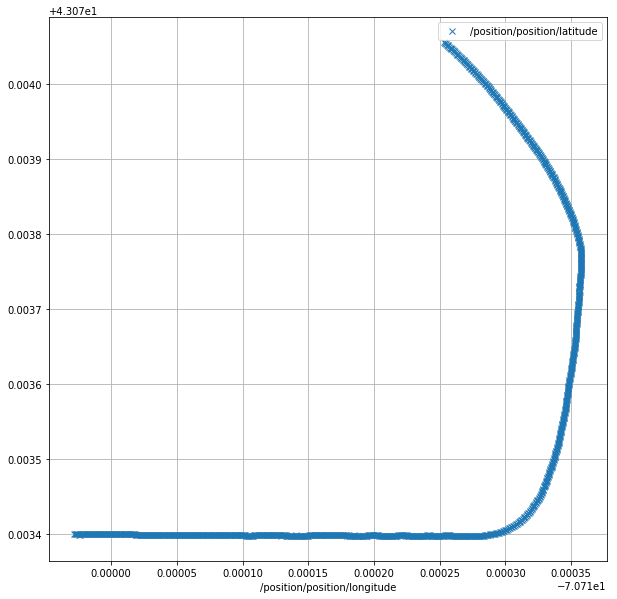

In [34]:
ax = DF['/position'].plot('/position/position/longitude','/position/position/latitude',style='x',figsize=(10,10))
ax.grid(True)


Ok - so that seems to work. Not ideal that we have to split up topics in this way, but actually, maybe more tractable. Lets try reading a bag file with images.

In [12]:
df = rosbag_pandas.bag_to_dataframe('/home/vschmidt/scratch/camera_1_compressed_2019-05-05-17-27-02_0.bag')

In [13]:
df.columns

Index([u'/camera_1/image_raw/compressed/data',
       u'/camera_1/image_raw/compressed/format',
       u'/camera_1/image_raw/compressed/header/frame_id',
       u'/camera_1/image_raw/compressed/header/seq',
       u'/camera_1/image_raw/compressed/header/stamp/nsecs',
       u'/camera_1/image_raw/compressed/header/stamp/secs'],
      dtype='object')

Lets write one of the images to a file.

In [81]:
F = file('test.jpg','wb')
F.write(base64.standard_b64decode(df['/camera_1/image_raw/compressed/data'].iloc[0]))
F.close()

![](test.jpg)

Lets turn this image into an OpenCV Image.

In [14]:
import cv2
import io


In [34]:
I = cv2.imdecode(np.frombuffer(base64.standard_b64decode(df['/camera_1/image_raw/compressed/data'].iloc[0])
                               ,dtype = np.uint8),cv2.IMREAD_COLOR)

That seems to have worked! Lets display it! Note we have to change the order of the colors - an incompatibility between cv2 convention and matplotlib.

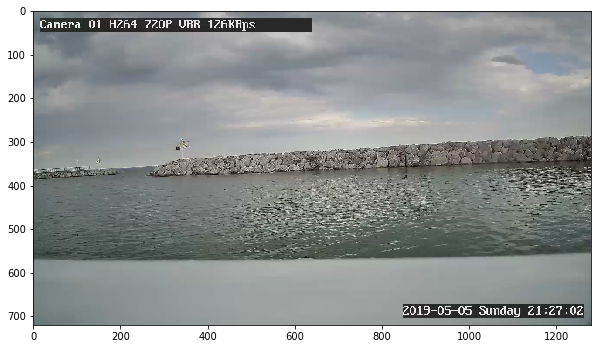

In [35]:
fig = plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_RGB2BGR))

Ok. lets have some fun. Lets see if we can detect the lines in this image. I'll summarize the steps first.

First, I'm applying a median blurring filter to the image with a 7x7 pixel window. This will smooth out the image a bit so we don't get thousands of lines, because the water's surface and the rock wall are pretty complex, and without blurring the results are overwhelming. 

The Hough transform requires a grayscale or binary image, so I am calling the Canney edge detector next to detect the edges which form the lines I want to detct.

Finally, I am calling the HoughLines() function to detect the lines themselves. This fucntion parameterizes a line using the equation rho = x cos(theta) + y sin(theta), where rho, x and y are in pixels and theta is the angle (measured downward) from the upper left corner of the image. See [Here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html) for more details.

NOTE: While the description and the figures on the site linked to above are useful, the code does not actually produce the plot shown. 

I am then looping through the results, painting the lines on a copy of the image and then displaying it. 

36


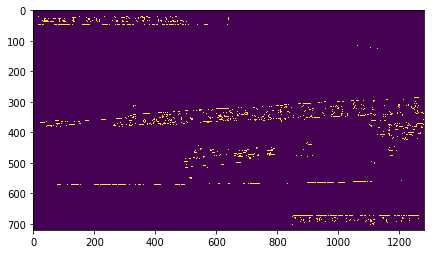

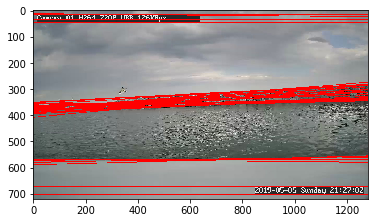

In [70]:
gray= cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
from copy import deepcopy
Ilines =deepcopy(I)

#from ipywidgets import Output, interact, interactive
#from IPython.display import clear_output
edges = cv2.Canny(cv2.medianBlur(gray,7),50,150,apertureSize=3)
#edges = cv2.Canny(gray,50,150,apertureSize=3)

lines = cv2.HoughLines(edges,1,np.pi/180./2.,150)
l,w = edges.shape
maxlinelength = np.sqrt(l**2+w**2)
print(len(lines))
for line in lines:
    rho = line[0][0]
    theta = line[0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + maxlinelength*(-b))
    y1 = int(y0 + maxlinelength*(a))
    x2 = int(x0 - maxlinelength*(-b))
    y2 = int(y0 - maxlinelength*(a))

    cv2.line(Ilines,(x1,y1),(x2,y2),(0,0,255),2)

plt.figure(figsize=(7,5))
plt.imshow(edges)
plt.figure()
plt.imshow(cv2.cvtColor(Ilines, cv2.COLOR_RGB2BGR))

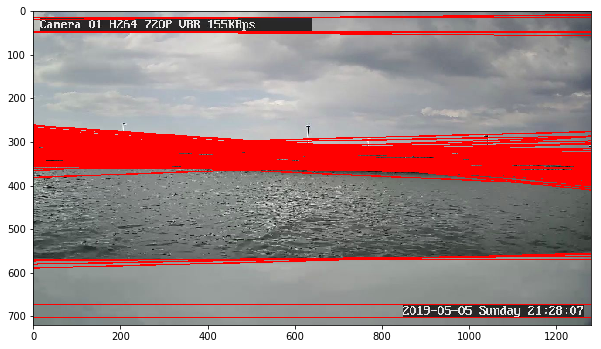

In [81]:
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(10,10))

im = plt.imshow(I)

def init():
    im.set_data(np.random.random((720, 1280, 3)))
    return [im]

def animate(data):
    I = cv2.imdecode(np.frombuffer(base64.standard_b64decode(data)
                               ,dtype = np.uint8),
                 cv2.IMREAD_COLOR)
    gray= cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
    Ilines =deepcopy(I)

    edges = cv2.Canny(cv2.medianBlur(gray,7),50,150,apertureSize=3)

    lines = cv2.HoughLines(edges,1,np.pi/180./2.,150)
    l,w = edges.shape
    maxlinelength = np.sqrt(l**2+w**2)
    for line in lines:
        rho = line[0][0]
        theta = line[0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + maxlinelength*(-b))
        y1 = int(y0 + maxlinelength*(a))
        x2 = int(x0 - maxlinelength*(-b))
        y2 = int(y0 - maxlinelength*(a))

        cv2.line(Ilines,(x1,y1),(x2,y2),(0,0,255),2)
    
    im.set_array(cv2.cvtColor(Ilines, cv2.COLOR_RGB2BGR))
    
    return [im]

anim = animation.FuncAnimation(fig,
                              animate,
                              init_func=init,
                              frames=df['/camera_1/image_raw/compressed/data'],
                              interval=20,
                              blit=True)

HTML(anim.to_html5_video())

Now lets try to read one of our darknet_detection_images. Presumably this should hold the annotated images of the detections. 

In [83]:
df = rosbag_pandas.bag_to_dataframe('/home/vschmidt/scratch/darknet_detection_images_2019-05-05-17-27-01_0.bag.active')

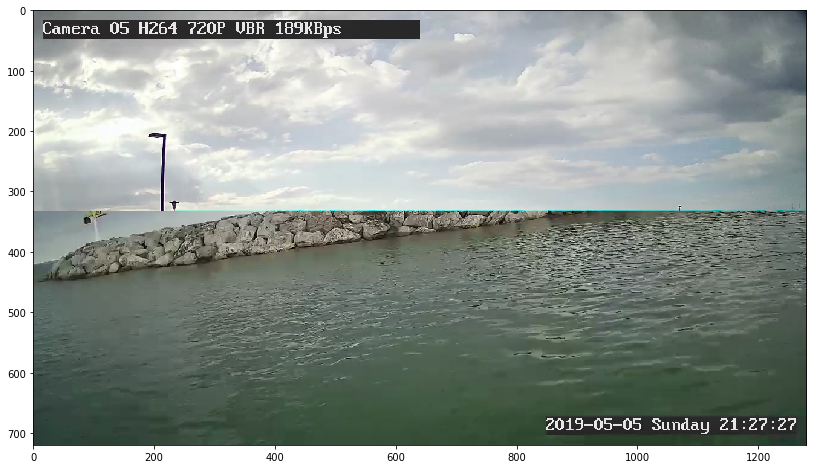

In [127]:
I = np.frombuffer(base64.standard_b64decode(df['/darknet_ros/detection_image/data'].iloc[0])
                               ,dtype = np.uint8)
I = np.reshape(I,(int(df['/darknet_ros/detection_image/height'].iloc[0]),
                  int(df['/darknet_ros/detection_image/width'].iloc[0]),3))
plt.figure(figsize=(14,8))
plt.imshow(I)

Hm. This took some trial and error, as the images in this bag are not in binary jpeg format but a binary representation of the RGB values. Thus no cv2.decode() step is required and one must reshape the data into the image size. 

Also interesting, this first image is not annotated in any way, and there doesn't appear to be any other information in the bag file as to what was detected in the image. 

Lets look at all of them in this file.

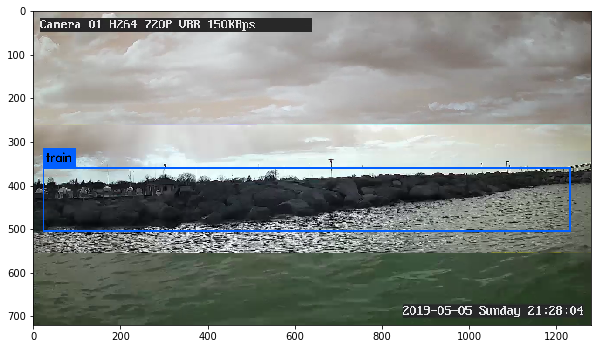

In [133]:
fig, ax = plt.subplots(figsize=(10,10))

im = plt.imshow(I)

def init():
    im.set_data(np.random.random((720, 1280, 3)))
    return [im]

def animate(data):
    I = np.frombuffer(base64.standard_b64decode(data),dtype = np.uint8)
    
    I = np.reshape(I,(int(df['/darknet_ros/detection_image/height'].iloc[0]),
                  int(df['/darknet_ros/detection_image/width'].iloc[0]),3))
    
    im.set_array(I)
    #im.set_array(cv2.cvtColor(I, cv2.COLOR_RGB2BGR))
    
    return [im]

anim = animation.FuncAnimation(fig,
                              animate,
                              init_func=init,
                              frames=df['/darknet_ros/detection_image/data'],
                              interval=1000,
                              blit=True)

HTML(anim.to_html5_video())

So it looks like the detection images are corrupted with partial frames from more than one image in each. That's unfortunate and something we'll have to investigate. Need to check to see how pervasive this problem is and where the problem lies. 